In [1]:
# import pandas as pd
# import sqlite3
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# import SQL_queries as q
# from IPython.display import display, HTML

# Exploratory Data Analysis - Pittsburgh Penguins Playoff Data From 2016 and 2017
--------
### To begin the EDA process, I use SQL queries to build DataFrames to include:

* general information about each game, play, event, and event locations
* skater stats
* team stats
* shift information
### [Check out the queries for yourself](SQL_queries.py)
----



In [2]:
 # conn = sqlite3.connect('NHL_data.db')

In [76]:
# pens_2016_playoff_df = pd.read_sql_query(q.playoff_2016_data_query, conn)
# pens_2016_playoff_df.head()

In [77]:
# pens_2017_playoff_df = pd.read_sql_query(q.playoff_2017_data_query, conn)
# pens_2017_playoff_df.head()

In [78]:
# pens_2016_playoff_df.columns

### As expected, some columns are the same.
Below I drop any duplicated columns, as well as any additional columns that are unnecessary at this time.

In [6]:
# playoff_dfs = [pens_2016_playoff_df, pens_2017_playoff_df]

In [7]:
# fixed_playoff_dfs = []
# for df in playoff_dfs:
#     df = df.iloc[:,~df.columns.duplicated()]
#     df = df.drop(['Unnamed: 0','player_id'], axis=1)
#     fixed_playoff_dfs.append(df)


In [79]:
# fixed_playoff_dfs

In [9]:
# pens_2016_playoff_df = fixed_playoff_dfs[0]
# pens_2017_playoff_df = fixed_playoff_dfs[1]

check to verify changes:

In [80]:
# pens_2016_playoff_df.columns

### To explore, let's take a closer look at event, secondaryType, and periodType:

In [83]:
# pens_2016_playoff_df.event.unique()

In [82]:
# pens_2016_playoff_df.secondaryType.unique()

In [84]:
# pens_2016_playoff_df.periodType.unique()

### Next, check for null values in both DataFrames:

In [81]:
# pens_2016_playoff_df.info()
# pens_2017_playoff_df.info()

Secondary type is the only column that contains null values. What percent are null? Is this column worth keeping?

In [85]:
# secondary_type_percent_null_1 = (pens_2016_playoff_df['secondaryType'].isnull().sum())/13179*100
# secondary_type_percent_null_2 = (pens_2017_playoff_df['secondaryType'].isnull().sum())/11559*100

# print(f'2016 Secondary Type Null Percent :{secondary_type_percent_null_1:.2f}%')
# print(f'2017 Secondary Type Null Percent :{secondary_type_percent_null_2:.2f}%')


Looking in on what events have secondary types:

In [86]:
# pens_2016_playoff_df[pens_2016_playoff_df['event']=='Penalty']

In [87]:
# pens_2016_playoff_df[pens_2016_playoff_df['event']=='Shot']

### After seeing that 72% & 73% of secondaryType rows are NULL, I've decided to drop the columns. 
When it comes to penalties, for this project I'll be looking at the penalty differentials, for which these types listed won't matter. Additionally, I'll be making a DataFrame specifically for shots, in which I can use the secondary type for this event. For now, event will suffice.

In [88]:
# pens_2016_playoff_df = pens_2016_playoff_df.drop('secondaryType',axis=1)
# pens_2017_playoff_df = pens_2017_playoff_df.drop('secondaryType', axis=1)

### Next step : Make things easier to discern.
To replace the columns team_id_for and team_id_against with abbreviations instead of numbers, I first pulled the data using a SQL query from the database, created a DataFrame, and then transformed it to a dictionary. Using this dictionary, the team_id numbers are replaced with easily identifiable team info.

In [89]:
# team_ids_df = pd.read_sql_query(q.get_abb_query, conn)
# abb_dict = pd.Series(team_ids_df.abbreviation.values,index=team_ids_df.team_id).to_dict()
# abb_dict

In [20]:
# #reset the df lists once more
# dfs = [pens_2016_playoff_df,pens_2017_playoff_df]
# fixed_playoff_dfs = []
# #replace and rename for each
# for df in dfs:
#     df = df.replace({'team_id_for':abb_dict})
#     df = df.replace({'team_id_against':abb_dict})
#     df = df.rename(columns={'team_id_for':'team_for', 'team_id_against':'team_against'})
#     fixed_playoff_dfs.append(df)
# #reassign to original df names
# pens_2016_playoff_df = fixed_playoff_dfs[0]
# pens_2017_playoff_df = fixed_playoff_dfs[1]

In [90]:
# pens_2016_playoff_df.head()

In [22]:
# games_teams_2016 = pens_2016_playoff_df.groupby('game_id').team_for.unique().reset_index()
# games_teams_2017 = pens_2017_playoff_df.groupby('game_id').team_for.unique().reset_index()

In [91]:
# games_teams_2017

This is helpful, but it shows both teams, where I only need the opposing team. 

In [92]:
# games_teams_2016['opposing_team'] = games_teams_2016['team_for'].apply(
#     lambda row: [val for val in row if val != 'PIT']
# )
# games_teams_2016.drop('team_for',axis=1, inplace=True)
# games_teams_2016

In [93]:
# games_teams_2017['opposing_team'] = games_teams_2017['team_for'].apply(
#    
#     lambda row: [val for val in row if val != 'PIT']
# )
# games_teams_2017.drop('team_for',axis=1, inplace=True)

In [94]:
# games_teams_2017

In [96]:
# games_teams_2016.opposing_team.value_counts()

In [97]:
# games_teams_2017.opposing_team.value_counts()

Looking above, we can see how many games are played against each opposing team, for both years.

Next, I need lists of game_ids for each round of both playoff years.

In [29]:
# #isolate the team name, since it has become a list instead of a string:
# games_teams_2016['opposing_team'] = games_teams_2016['opposing_team'].str[0]

In [95]:
# games_teams_2016

In [98]:
# #works well! do for 2017 also
# games_teams_2017['opposing_team'] = games_teams_2017['opposing_team'].str[0]

In [100]:
# games_teams_2016.groupby('opposing_team').game_id.unique()

In [99]:
# games_teams_2017.groupby('opposing_team').game_id.unique()

I want a list of only game_ids for each opposing team round:

In [103]:
# #2016:
# NYR_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='NYR'].game_id)
# SJS_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='SJS'].game_id)
# TBL_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='TBL'].game_id)
# WSH_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='WSH'].game_id)
# #2017:
# CBJ_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='CBJ'].game_id)
# NSH_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='NSH'].game_id)
# OTT_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='OTT'].game_id)
# WSH_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='WSH'].game_id)

### Next, I can choose to isolate information from the original large DataFrame, based on the game_id numbers

These were the round match-ups:

--------------


| Year   | 2016                  | 2017 |
|--------|-----------------------|-----|
| Round 1 | New York Rangers      | Columbus Blue Jackets |
| Round 2 | Washington Capitals   | Washington Capitals |
| Round 3 | Tampa Bay Lightning   | Ottowa Senators |
| Final | San Jose Sharks       | Nashville Predators |


In [104]:
# #Breaking the data into separate rounds of the playoffs
# 
# #2016:
# Round_1_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(NYR_2016_games)]
# Round_2_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(WSH_2016_games)]
# Round_3_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(TBL_2016_games)]
# Round_4_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(SJS_2016_games)]
# 
# #2017:
# Round_1_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(CBJ_2017_games)]
# Round_2_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(WSH_2017_games)]
# Round_3_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(OTT_2017_games)]
# Round_4_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(NSH_2017_games)]


Take another look at what we have for this first DataFrame:

In [105]:
# Round_1_2016

### Let's take a closer look at what the player types are for each event:

In [37]:
events = Round_1_2016['event'].unique()
for event in events:
    print(f'{event} Player Type Options:',end='')
    print(Round_1_2016[Round_1_2016['event']==event].playerType.unique())

Faceoff Player Type Options:['Winner' 'Loser']
Hit Player Type Options:['Hitter' 'Hittee']
Blocked Shot Player Type Options:['Shooter' 'Blocker']
Shot Player Type Options:['Goalie' 'Shooter']
Missed Shot Player Type Options:['Shooter']
Giveaway Player Type Options:['PlayerID']
Penalty Player Type Options:['PenaltyOn' 'DrewBy' 'ServedBy']
Takeaway Player Type Options:['PlayerID']
Goal Player Type Options:['Goalie' 'Assist' 'Scorer']


### It seems that most playerTypes are unique for the event, with the exception of 'Shooter', which is used for Blocked Shots, Shots, and Missed Shots. Additionally, Takeaways and giveaways give only the playerID.

## For an overall look, we can look at the sum of each category by player for each round:
### 2016:

In [106]:
# # Define a function to print DataFrame with header
# def print_round_info(round_name, df):
#     print_large(f"## {round_name}, 2016\n")
#     display(df)
#     print("\n\n")

In [107]:
# # Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# 
# # Your DataFrame printing code
# print("## Round 1, 2016\n")
# display(Round_1_2016.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# print("## Round 2, 2016\n")
# display(Round_2_2016.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# print("## Round 3, 2016\n")
# display(Round_3_2016.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# print("## Final Round, 2016\n")
# display(Round_4_2016.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# # Reset display options to the default if needed
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')


Although this is a nice way to get an overlook, it's also helpful to look at it the other direction (grouped by playerType):

### 2017:

In [108]:
# # Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# 
# # Your DataFrame printing code
# print("## Round 1, 2017\n")
# display(Round_1_2017.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# print("## Round 2, 2017\n")
# display(Round_2_2017.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# print("## Round 3, 2017\n")
# display(Round_3_2017.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# print("## Final Round, 2017\n")
# display(Round_4_2017.pivot_table(index='lastName', columns='playerType', aggfunc='size', fill_value=0))
# print("\n\n")
# 
# # Reset display options to the default if needed
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')


# We'll use this info to calculate some basic player stats

### First, what about the Faceoff differential? 
#### To calculate this, we need numbers for Winner vs Loser, starting with 2016:

In [111]:
# print('Faceoff Wins, Round 1, 2016')
# Round_1_faceoff_wins = Round_1_2016[Round_1_2016['playerType']=='Winner']
# Round_1_faceoff_wins = Round_1_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_1_faceoff_wins,'\n\n')
# 
# print('Faceoff Wins, Round 2, 2016')
# Round_2_faceoff_wins = Round_2_2016[Round_2_2016['playerType']=='Winner']
# Round_2_faceoff_wins = Round_2_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_2_faceoff_wins,'\n\n')
# 
# print('Faceoff Wins, Round 3, 2016')
# Round_3_faceoff_wins = Round_3_2016[Round_3_2016['playerType']=='Winner']
# Round_3_faceoff_wins = Round_3_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_3_faceoff_wins,'\n\n')
# 
# print('Faceoff Wins, Final, 2016')
# Round_4_faceoff_wins = Round_4_2016[Round_4_2016['playerType']=='Winner']
# Round_4_faceoff_wins = Round_4_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_4_faceoff_wins,'\n\n')

In [112]:
# print('Faceoff Losses, Round 1, 2016')
# Round_1_faceoff_losses = Round_1_2016[Round_1_2016['playerType']=='Loser']
# Round_1_faceoff_losses = Round_1_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_1_faceoff_losses,'\n\n')
# 
# print('Faceoff Losses, Round 2, 2016')
# Round_2_faceoff_losses = Round_2_2016[Round_2_2016['playerType']=='Loser']
# Round_2_faceoff_losses = Round_2_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_2_faceoff_losses,'\n\n')
# 
# print('Faceoff Losses, Round 3, 2016')
# Round_3_faceoff_losses = Round_3_2016[Round_3_2016['playerType']=='Loser']
# Round_3_faceoff_losses = Round_3_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_3_faceoff_losses,'\n\n')
# 
# print('Faceoff Losses, Final, 2016')
# Round_4_faceoff_losses = Round_4_2016[Round_4_2016['playerType']=='Loser']
# Round_4_faceoff_losses = Round_4_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# print(Round_4_faceoff_losses,'\n\n')

Super. Put them together into one to easily calculate Faceoff differential for each player:

In [114]:
# print('Faceoff Stats, Round 1, 2016')
# Round_1_faceoff_stats = Round_1_faceoff_wins.merge(Round_1_faceoff_losses, left_on='lastName', right_on='lastName')
# print(Round_1_faceoff_stats,'\n\n')
# 
# print('Faceoff Stats, Round 2, 2016')
# Round_2_faceoff_stats = Round_2_faceoff_wins.merge(Round_2_faceoff_losses, left_on='lastName', right_on='lastName')
# print(Round_2_faceoff_stats,'\n\n')
# 
# print('Faceoff Stats, Round 3, 2016')
# Round_3_faceoff_stats = Round_3_faceoff_wins.merge(Round_3_faceoff_losses, left_on='lastName', right_on='lastName')
# print(Round_3_faceoff_stats,'\n\n')
# 
# print('Faceoff Stats, Final, 2016')
# Round_4_faceoff_stats = Round_4_faceoff_wins.merge(Round_4_faceoff_losses, left_on='lastName', right_on='lastName')
# print(Round_4_faceoff_stats,'\n\n')

In [113]:
# Round_1_faceoff_stats['Differential'] = Round_1_faceoff_stats['count_x']/(Round_1_faceoff_stats['count_x']+Round_1_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Round 1, 2016')
# print(Round_1_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')
# 
# Round_2_faceoff_stats['Differential'] = Round_2_faceoff_stats['count_x']/(Round_2_faceoff_stats['count_x']+Round_2_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Round 2, 2016')
# print(Round_2_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')
# 
# Round_3_faceoff_stats['Differential'] = Round_3_faceoff_stats['count_x']/(Round_3_faceoff_stats['count_x']+Round_3_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Round 3, 2016')
# print(Round_3_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')
# 
# Round_4_faceoff_stats['Differential'] = Round_4_faceoff_stats['count_x']/(Round_4_faceoff_stats['count_x']+Round_4_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Final, 2016')
# print(Round_4_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')

Seen above, Nick Bonino only makes it to the top 5 for faceoff success in the first Round for 2016. 

#### Now, repeat for 2017:

In [115]:
# #calculate wins
# #round1
# Round_1_faceoff_wins = Round_1_2017[Round_1_2017['playerType']=='Winner']
# Round_1_faceoff_wins = Round_1_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# #round2
# Round_2_faceoff_wins = Round_2_2017[Round_2_2017['playerType']=='Winner']
# Round_2_faceoff_wins = Round_2_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# #round 3
# Round_3_faceoff_wins = Round_3_2017[Round_3_2017['playerType']=='Winner']
# Round_3_faceoff_wins = Round_3_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# #final round
# Round_4_faceoff_wins = Round_4_2017[Round_4_2017['playerType']=='Winner']
# Round_4_faceoff_wins = Round_4_faceoff_wins.groupby('lastName').playerType.value_counts().reset_index()
# 
# 
# #calculate losses
# #round1
# Round_1_faceoff_losses = Round_1_2017[Round_1_2017['playerType']=='Loser']
# Round_1_faceoff_losses = Round_1_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# #round 2
# Round_2_faceoff_losses = Round_2_2017[Round_2_2017['playerType']=='Loser']
# Round_2_faceoff_losses = Round_2_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# #round 3
# Round_3_faceoff_losses = Round_3_2017[Round_3_2017['playerType']=='Loser']
# Round_3_faceoff_losses = Round_3_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# #final round
# Round_4_faceoff_losses = Round_4_2017[Round_4_2017['playerType']=='Loser']
# Round_4_faceoff_losses = Round_4_faceoff_losses.groupby('lastName').playerType.value_counts().reset_index()
# 
# 
# #merge sets
# #round 1
# Round_1_faceoff_stats = Round_1_faceoff_wins.merge(Round_1_faceoff_losses, left_on='lastName', right_on='lastName')
# #round 2
# Round_2_faceoff_stats = Round_2_faceoff_wins.merge(Round_2_faceoff_losses, left_on='lastName', right_on='lastName')
# #round 3
# Round_3_faceoff_stats = Round_3_faceoff_wins.merge(Round_3_faceoff_losses, left_on='lastName', right_on='lastName')
# #round 4
# Round_4_faceoff_stats = Round_4_faceoff_wins.merge(Round_4_faceoff_losses, left_on='lastName', right_on='lastName')
# 
# #print results:
# Round_1_faceoff_stats['Differential'] = Round_1_faceoff_stats['count_x']/(Round_1_faceoff_stats['count_x']+Round_1_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Round 1, 2017')
# print(Round_1_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')
# 
# Round_2_faceoff_stats['Differential'] = Round_2_faceoff_stats['count_x']/(Round_2_faceoff_stats['count_x']+Round_2_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Round 2, 2017')
# print(Round_2_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')
# 
# Round_3_faceoff_stats['Differential'] = Round_3_faceoff_stats['count_x']/(Round_3_faceoff_stats['count_x']+Round_3_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Round 3, 2017')
# print(Round_3_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')
# 
# Round_4_faceoff_stats['Differential'] = Round_4_faceoff_stats['count_x']/(Round_4_faceoff_stats['count_x']+Round_4_faceoff_stats['count_y'])
# print('Top Five Faceoff Differentials, Final, 2017')
# print(Round_4_faceoff_stats[['lastName','Differential']].sort_values(by='Differential', ascending=False).head(5),'\n\n')


### Before we move into more nitty-gritty player s tats, let's use some visual aids to see the number and locations of positive plays on the ice

If we just want to look at good plays, we need a way to filter positive and negative plays:

In [46]:
# #
# def sort_good_bad_plays(df):
#     good_plays_df = df.loc[((df['playerType'].isin(['Hitter','Blocker','Scorer','Shooter'])) | (df['event']=='Takeaway'))]
#     bad_plays_df = df.loc[(df['playerType'].isin(['Hittee','Shooter','DrewBy'])) | (df['event']=='Giveaway')]
#     return good_plays_df, bad_plays_df
#     

In [47]:
#separate good/bad plays for every round in 2016 and 2017:
#2016:
# Round_1_2016_good_plays, Round_1_2016_bad_plays = sort_good_bad_plays(Round_1_2016)
# Round_2_2016_good_plays, Round_2_2016_bad_plays = sort_good_bad_plays(Round_2_2016)
# Round_3_2016_good_plays, Round_3_2016_bad_plays = sort_good_bad_plays(Round_3_2016)
# Round_4_2016_good_plays, Round_4_2016_bad_plays = sort_good_bad_plays(Round_4_2016)

# #2017:
# Round_1_2017_good_plays, Round_1_2017_bad_plays = sort_good_bad_plays(Round_1_2017)
# Round_2_2017_good_plays, Round_2_2017_bad_plays = sort_good_bad_plays(Round_2_2017)
# Round_3_2017_good_plays, Round_3_2017_bad_plays = sort_good_bad_plays(Round_3_2017)
# Round_4_2017_good_plays, Round_4_2017_bad_plays = sort_good_bad_plays(Round_4_2017)

This is great, but for mapping purposes I just want to look at the Penguins for now.

#### To easily sort using names, I'll build a new dF based on the Pens_2016_roster.csv and Pens_2017_roster.csv files:

In [116]:
# # Pens_2016_roster = pd.read_csv('Pens_2016_roster.csv')
# Pens_2017_roster = pd.read_csv('Pens_2017_roster.csv')
# Pens_2016_roster.columns

In [109]:
# Pens_2016_roster['Player']

In [110]:
# Pens_2017_roster.Player

In [117]:
#remove special characters, since they are not used in the main database.
# Pens_2016_roster['Player'] = Pens_2016_roster['Player'].replace({r'\(C\)': '', '-': '', 'ö': 'o', 'ä': 'a', 'ü': 'u'}, regex=True).str.strip()
# Pens_2017_roster['Player'] = Pens_2017_roster['Player'].replace({r'\(C\)': '', '-': '', 'ö': 'o', 'ä': 'a', 'ü': 'u'}, regex=True).str.strip()
# print(Pens_2016_roster.Player,Pens_2017_roster.Player)

In [118]:
#separate Just the last Names to prepare for data merge
# Pens_2016_roster[['firstName', 'lastName']] = Pens_2016_roster['Player'].str.split(expand=True)
# Pens_2016_roster_list = list(Pens_2016_roster['lastName'])


# Pens_2017_roster[['firstName', 'lastName']] = Pens_2017_roster['Player'].str.split(expand=True)
# Pens_2017_roster_list = list(Pens_2017_roster['lastName'])
# 
# print(f'2016 Players: {Pens_2016_roster_list}\n\n\n2017 Players:{Pens_2017_roster_list}')

Now we have the names, we can easily filter the good and bad plays just for Penguins players:

In [53]:
#Filter for all 4 rounds, 2016 and 2017 and build a list:

#2016:
# Round_1_2016_good_plays = Round_1_2016_good_plays[Round_1_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
# Round_1_2016_bad_plays = Round_1_2016_bad_plays[Round_1_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]
# 
# Round_2_2016_good_plays = Round_2_2016_good_plays[Round_2_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
# Round_2_2016_bad_plays = Round_2_2016_bad_plays[Round_2_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]
# 
# Round_3_2016_good_plays = Round_3_2016_good_plays[Round_3_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
# Round_3_2016_bad_plays = Round_3_2016_bad_plays[Round_3_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]
# 
# Round_4_2016_good_plays = Round_4_2016_good_plays[Round_4_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
# Round_4_2016_bad_plays = Round_4_2016_bad_plays[Round_4_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]
# 
# good_plays_2016_all_rounds = [Round_1_2016_good_plays,Round_2_2016_good_plays,Round_3_2016_good_plays,Round_4_2016_good_plays]
# bad_plays_2016_all_rounds = [Round_1_2016_bad_plays,Round_2_2016_bad_plays,Round_3_2016_bad_plays,Round_4_2016_bad_plays]

# #2017:
# Round_1_2017_good_plays = Round_1_2017_good_plays[Round_1_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
# Round_1_2017_bad_plays = Round_1_2017_bad_plays[Round_1_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]
# 
# Round_2_2017_good_plays = Round_2_2017_good_plays[Round_2_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
# Round_2_2017_bad_plays = Round_2_2017_bad_plays[Round_2_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]
# 
# Round_3_2017_good_plays = Round_3_2017_good_plays[Round_3_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
# Round_3_2017_bad_plays = Round_3_2017_bad_plays[Round_3_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]
# 
# Round_4_2017_good_plays = Round_4_2017_good_plays[Round_4_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
# Round_4_2017_bad_plays = Round_4_2017_bad_plays[Round_4_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]
# 
# good_plays_2017_all_rounds = [Round_1_2017_good_plays,Round_2_2017_good_plays,Round_3_2017_good_plays,Round_4_2017_good_plays]
# bad_plays_2017_all_rounds = [Round_1_2017_bad_plays,Round_2_2017_bad_plays,Round_3_2017_bad_plays,Round_4_2017_bad_plays]

In [119]:
# #take a look at the playerType values:
# good_player_types = Round_1_2016_good_plays.playerType.unique()
# bad_player_types = Round_1_2016_bad_plays.playerType.unique()
# 
# #leave takeaways separate for now:
# good_player_types = np.delete(good_player_types,4,0)
# bad_player_types  = np.delete(bad_player_types,2,0)
# #verify deletion:
# bad_player_types, good_player_types

In [120]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# 
# def plotHockeyPoints_all_rounds(round_dfs, column, column_filter, players_of_interest):
#     """
#     Plot play points on the ice for all rounds, differentiating colors for each dataframe.
# 
#     :param round_dfs: List of DataFrames for each round
#     :param column: This is the category that you are plotting on
#     :param column_filter: Choose a way to filter the category
#     :param players_of_interest: List of players to include
#     :return: An image of the x, y coordinates for each play fitting the filter, overlayed on a hockey rink.
#     """
#     # Combine all rounds into a single DataFrame
#     combined_df = pd.concat(round_dfs)
# 
#     plt.figure(figsize=(10, 8))
# 
#     # Filter the combined DataFrame
#     scatter_data = combined_df.loc[(combined_df[column] == column_filter) & (combined_df['lastName'].isin(players_of_interest))]
# 
#     # Plot with background image
#     fig = sns.scatterplot(x='x', y='y', data=scatter_data, hue='lastName', palette='tab20')
# 
#     plt.title(f'Location of {column_filter}s')
#     im = plt.imread("rink.jpg")
#     im = fig.imshow(im, extent=[-105, 105, -45.5, 45.5])
#     plt.xlabel('')
#     plt.ylabel('')
#     fig.set(xticklabels=[])
#     fig.set(yticklabels=[])
#     fig.grid(False)
# 
#     # Count occurrences of each player in the legend
#     player_counts = scatter_data['lastName'].value_counts().to_dict()
# 
#     # Get legend handles and labels
#     handles, labels = fig.get_legend_handles_labels()
# 
#     # Modify legend labels to include counts, handle cases where player is not in player_counts
#     legend_labels = [f'{label} ({player_counts.get(label, 0)})' for label in labels]
#     fig.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 
#     plt.show()
#     plt.close()
# 
# # Example usage:
# # Assuming good_plays_2016_all_rounds is a list of dataframes for each round
# plotHockeyPoints_all_rounds(good_plays_2016_all_rounds, column='playerType', column_filter='Scorer', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])


In [55]:
# def plotHockeyPoints(data, column, column_filter):
#     '''
#     Plot play points on the ice:
#     :param data: takes a DataFrame
#     :param column: this is the category that you are plotting on
#     :param column_filter: choose a way to filter the category
#     :return: an image of the x,y coordinates for each play fitting the filter, overlayed on a hockeyrink. 
#     '''
#     scatter_data = data.loc[data[column] == column_filter]
#     xpoints = np.array(scatter_data['x'])
#     ypoints = np.array(scatter_data['y'])
#     
#     plt.figure(figsize=(10, 8))
#     
#     # Order legend names by value count from high to low
#     legend_order = scatter_data['lastName'].value_counts().index.tolist()
#     
#     #plots with background image
#     fig = sns.scatterplot(x=xpoints, y=ypoints, data=scatter_data, hue='lastName', palette='tab20', hue_order=legend_order)
#     plt.title(f'Location of {column_filter}s')
#     im = plt.imread("rink.jpg")
#     im = fig.imshow(im, extent=[-105, 105, -45.5, 45.5])
#     plt.xlabel('')
#     plt.ylabel('')
#     fig.set(xticklabels=[])
#     fig.set(yticklabels=[])
#     fig.grid(False)
#     
#     # Count occurrences of each player in the legend
#     player_counts = scatter_data['lastName'].value_counts().to_dict()
# 
#     # Get legend handles and labels
#     handles, labels = fig.get_legend_handles_labels()
# 
#     # Modify legend labels to include counts
#     legend_labels = [f'{label} ({player_counts[label]})' for label in labels]
#     fig.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 
#     plt.show()
#     plt.close()


## Visualizing Good Plays, 2016

In [56]:
# # Define a function to increase font size
# def print_large(text):
#     display(HTML(f'<p style="font-size:28px; text-align:center;">{text}</p>'))

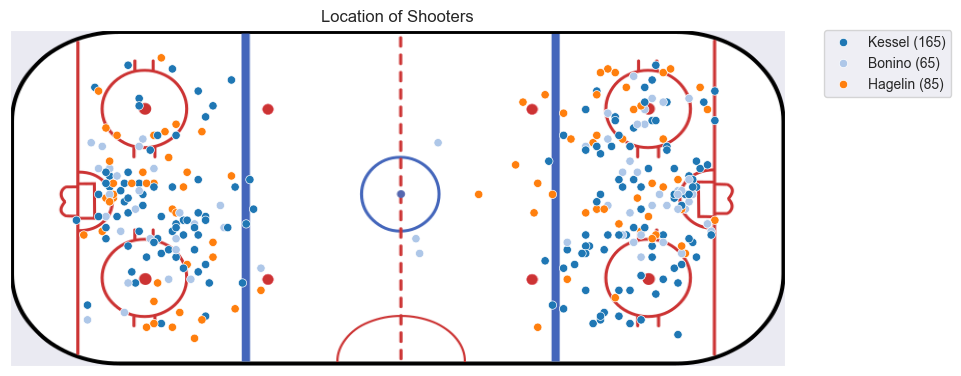

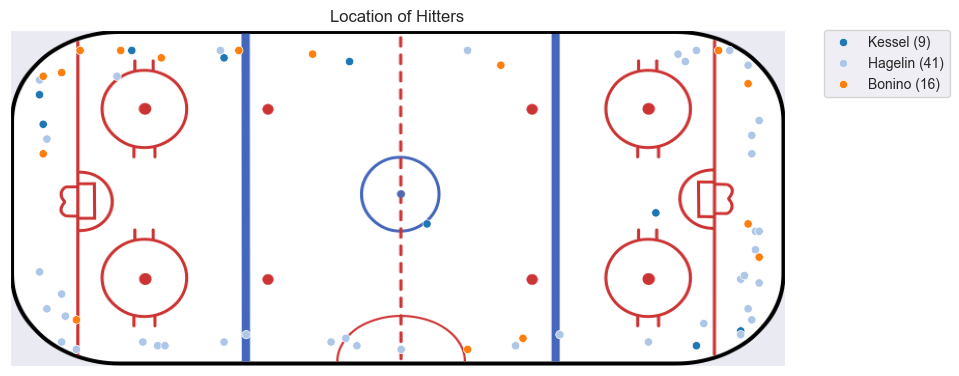

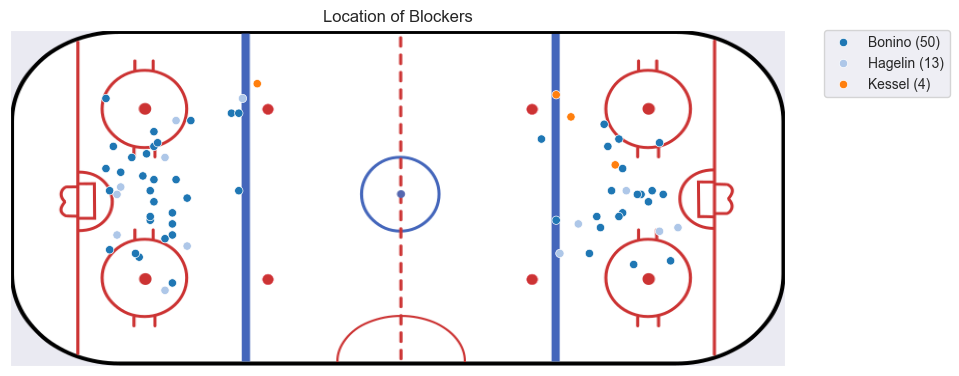

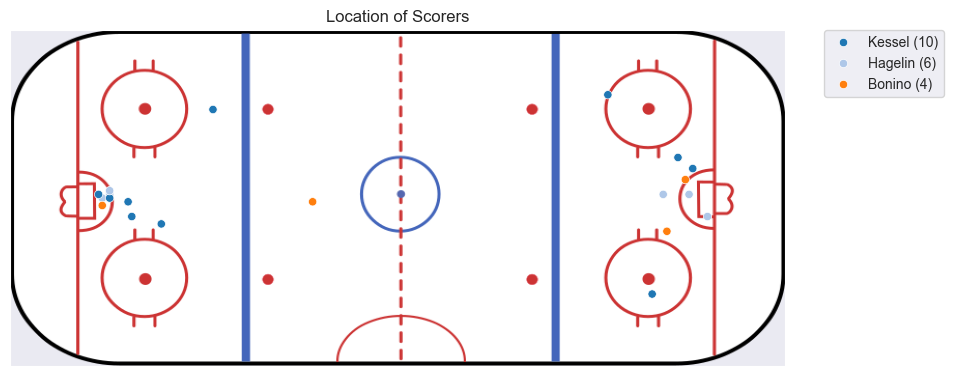

In [121]:
print_large('Good Plays for HBK Line, 2016')
for type in good_player_types:
    plotHockeyPoints_all_rounds(good_plays_2016_all_rounds, 'playerType', type, ['Hagelin', 'Bonino','Kessel'])

In [122]:
# count = 1
# for play in good_plays_2016_all_rounds:
#     print_large(f'Good Plays, Round {count}, 2016')
#     for type in good_player_types:
#         plotHockeyPoints(play, 'playerType',type)
#     count += 1

## Visualizing Bad Plays, 2016

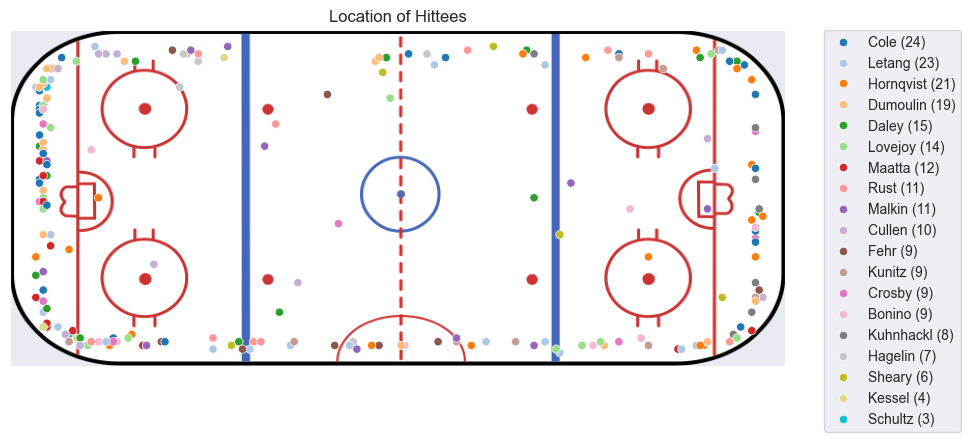

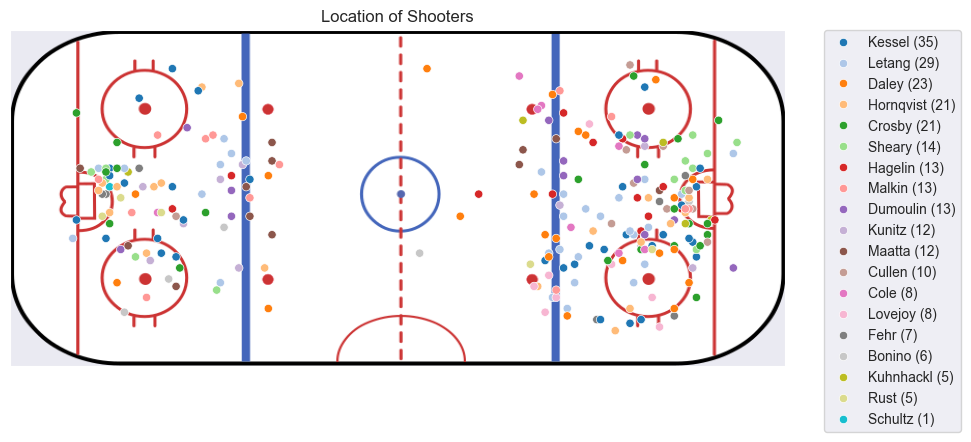

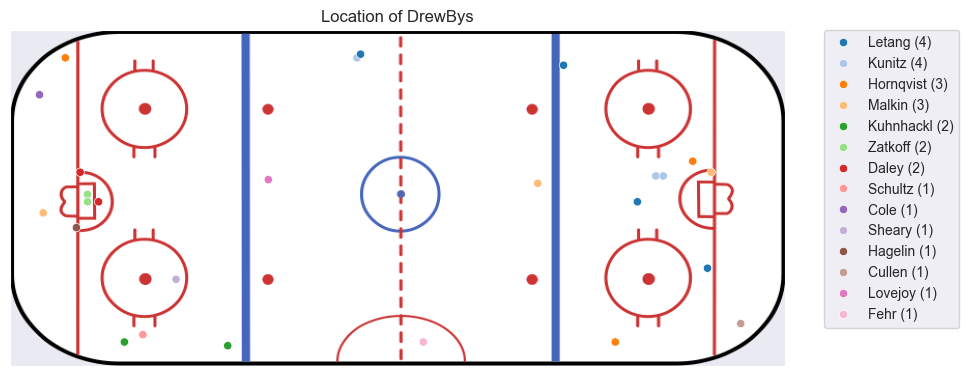

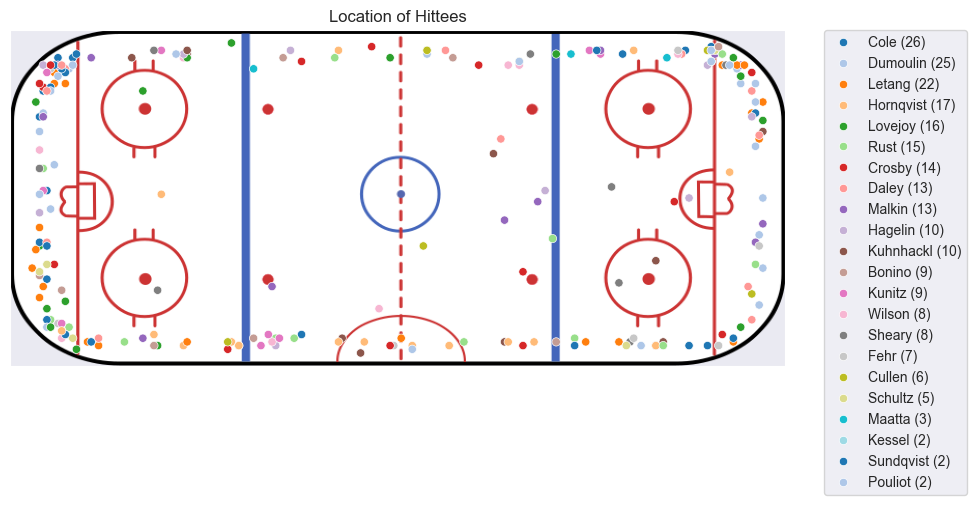

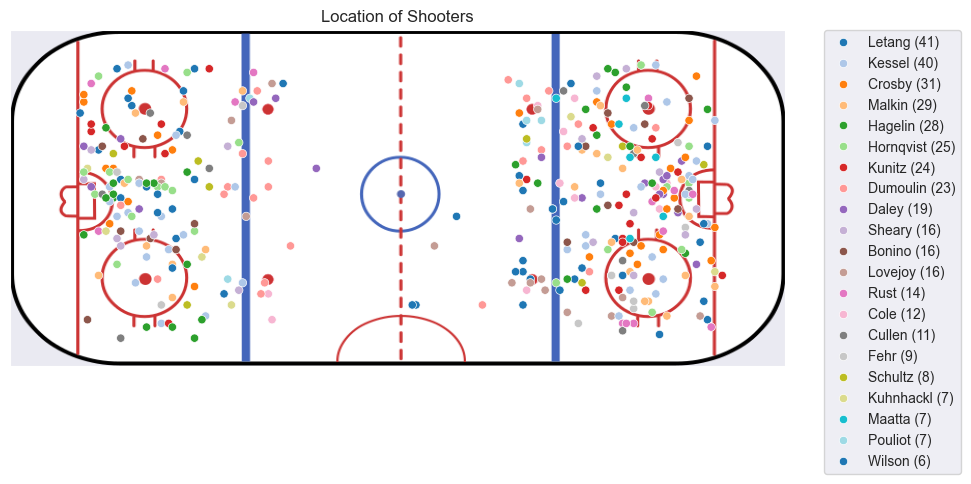

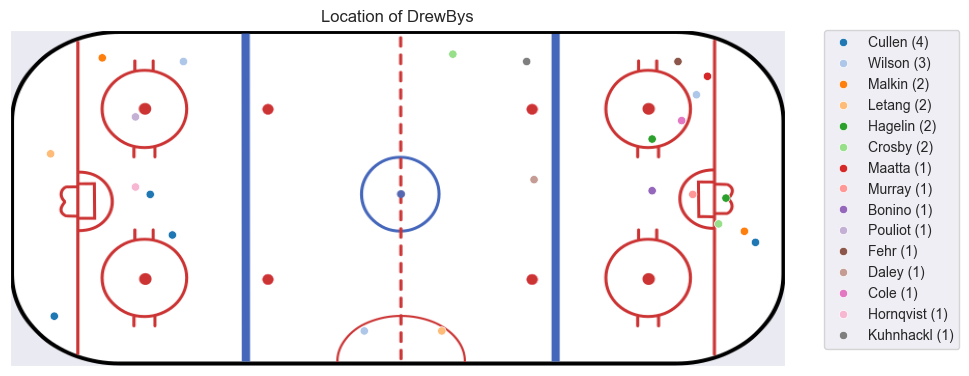

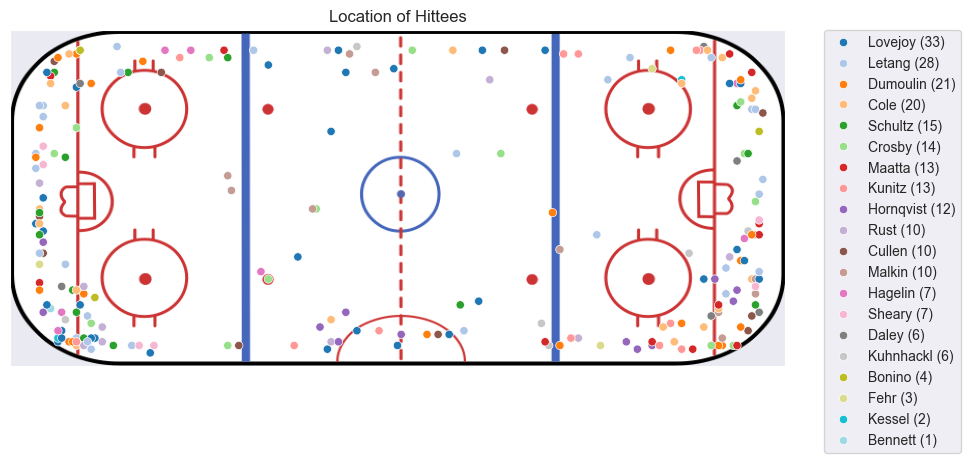

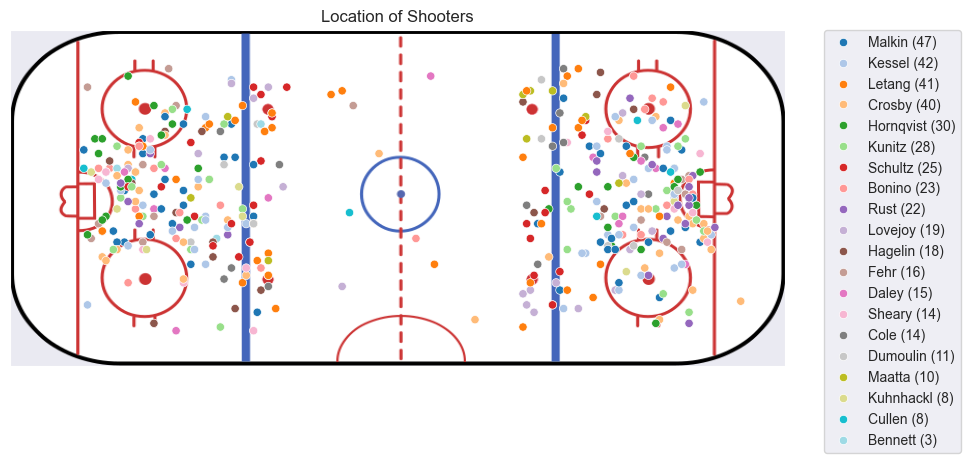

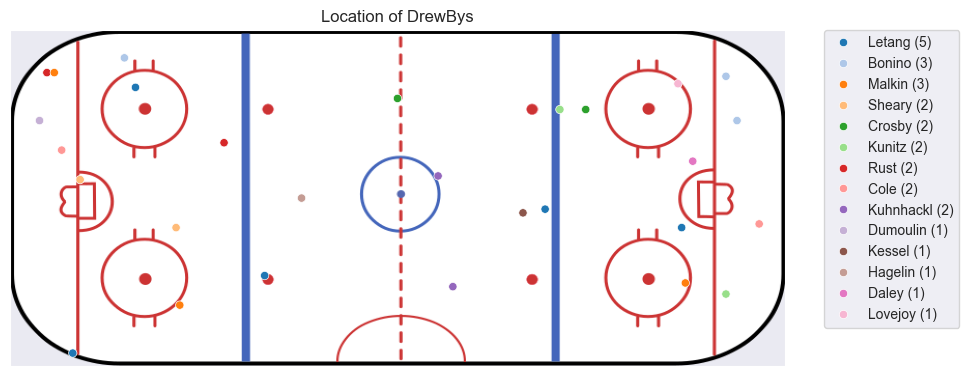

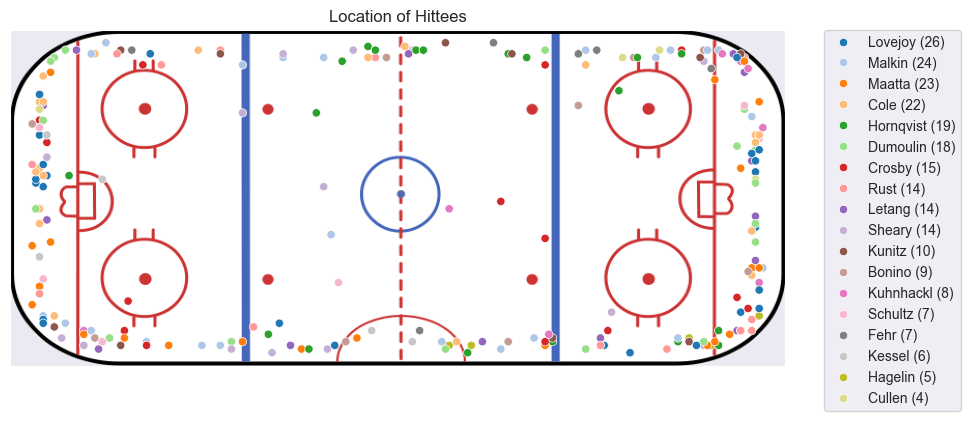

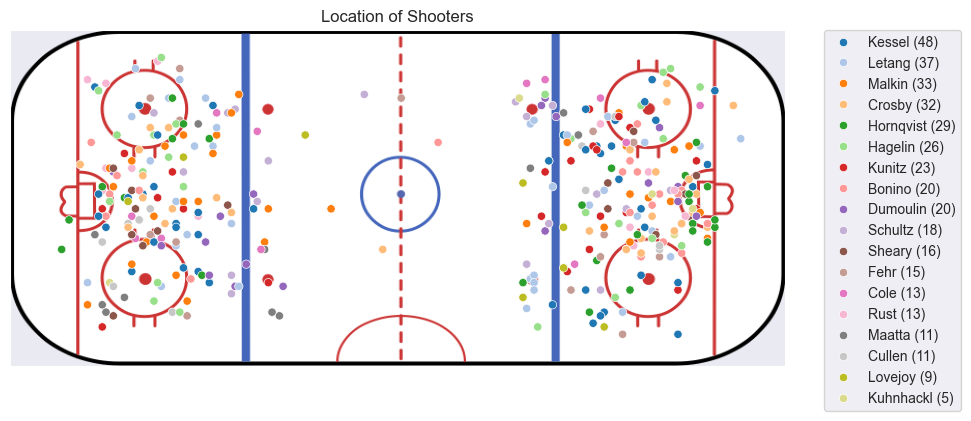

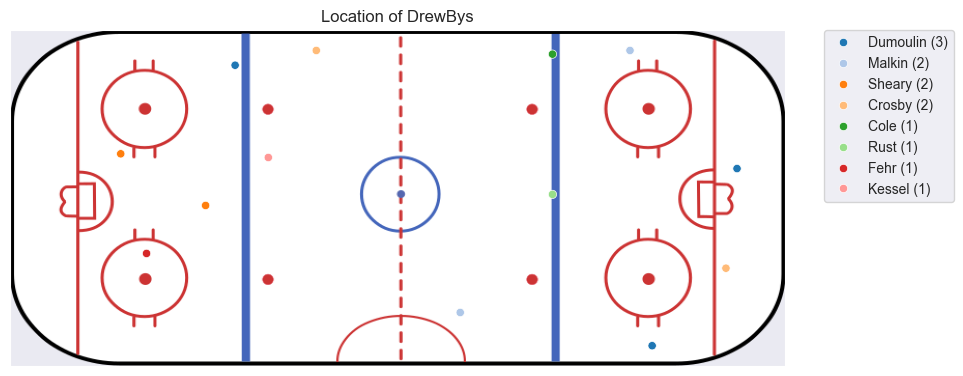

In [58]:
# count = 1
# for play in bad_plays_2016_all_rounds:
#     print_large(f'Bad Plays, Round {count}, 2016')
#     for type in bad_player_types:
#         plotHockeyPoints(play, 'playerType',type)
#     count += 1

## Visualizing Takeaways and Giveaways, 2016

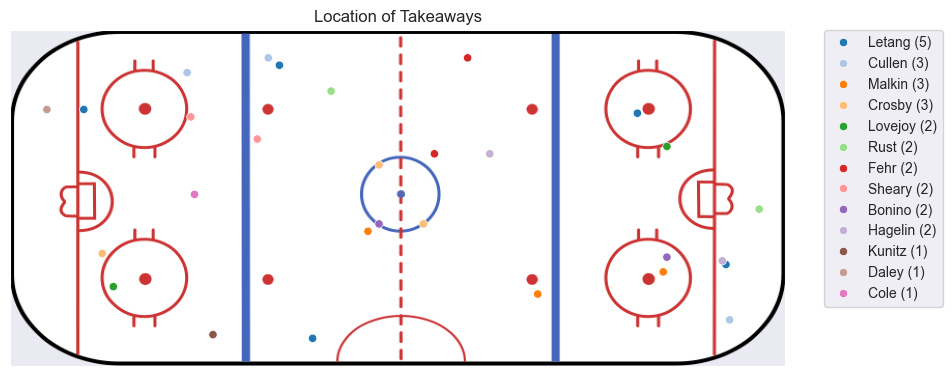

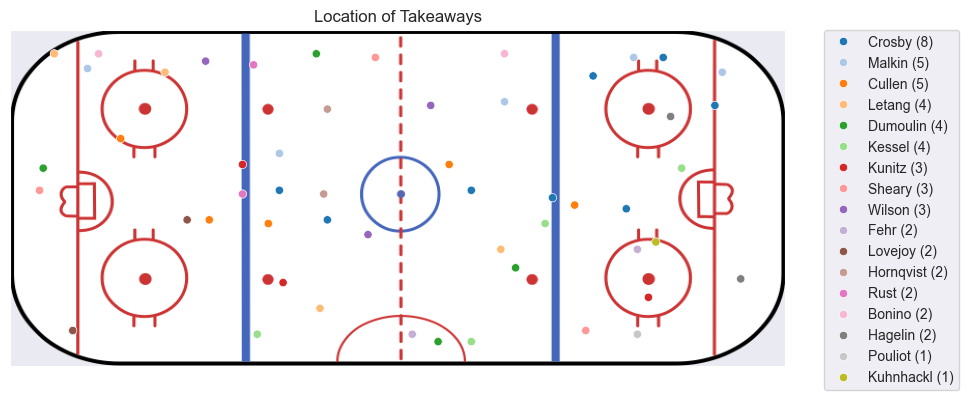

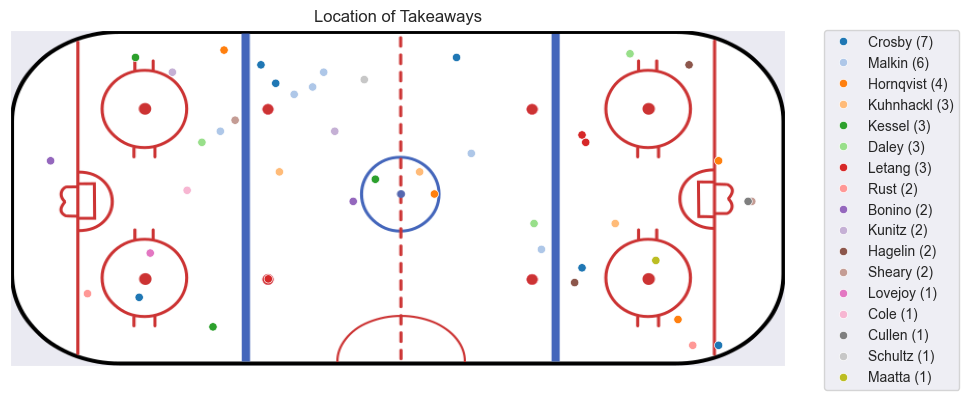

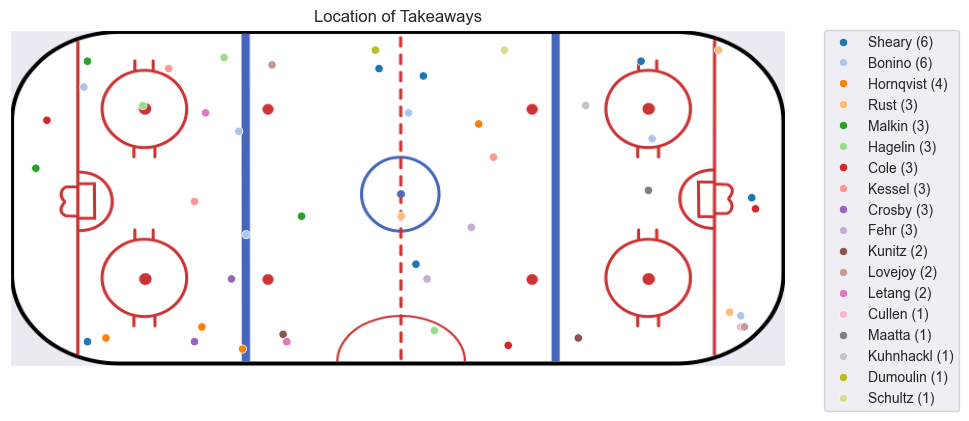

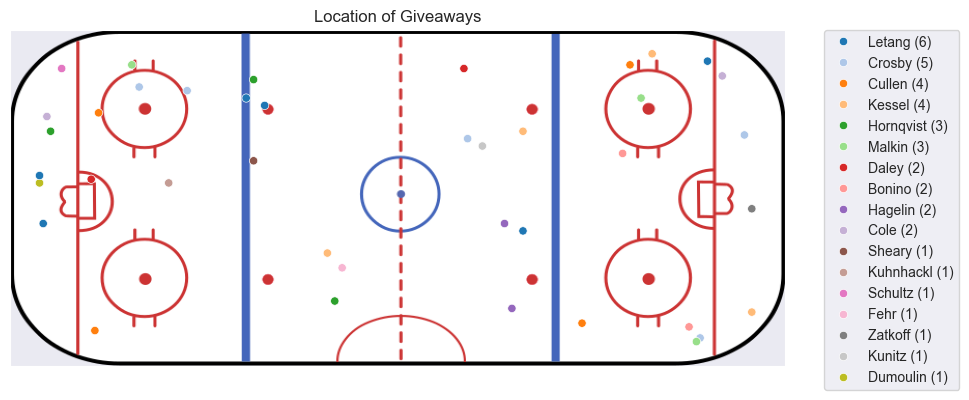

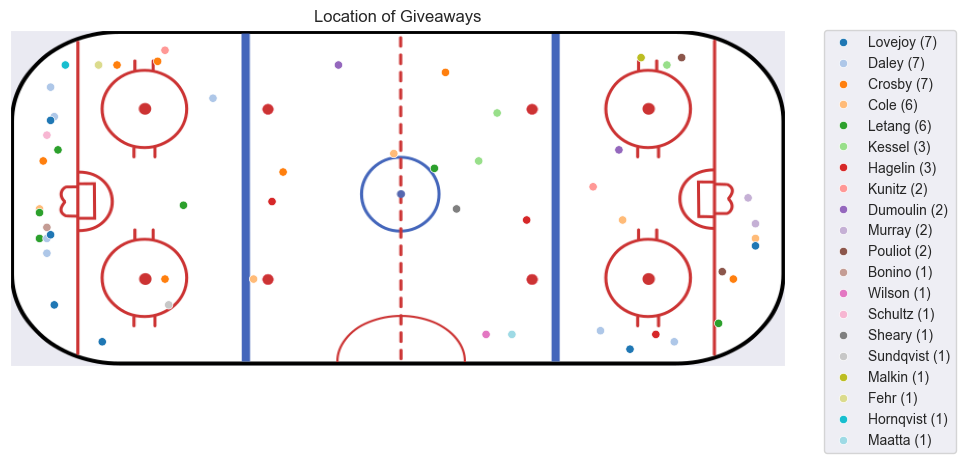

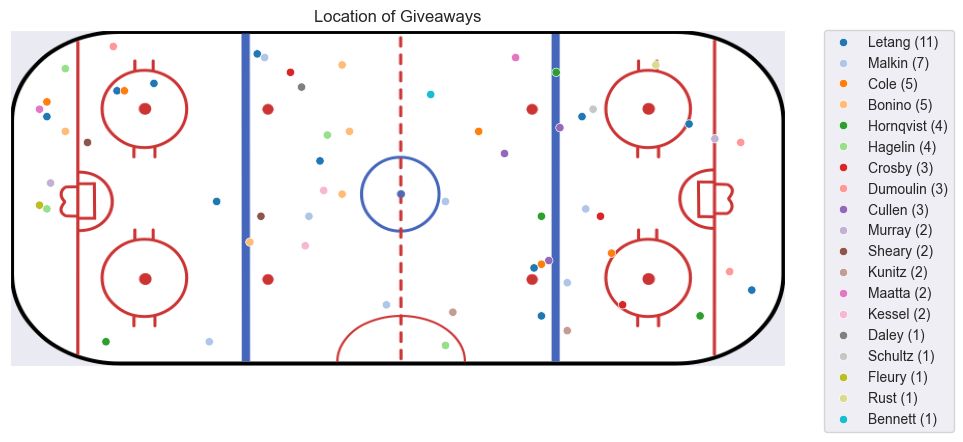

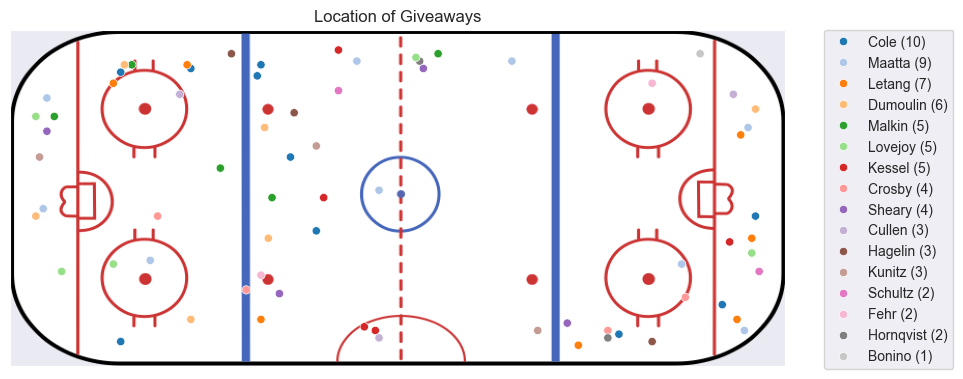

In [59]:
count = 1
for play in good_plays_2016_all_rounds:
    print_large(f'Takeaways in Round {count}, 2016')
    plotHockeyPoints(play, 'event','Takeaway')
    count += 1
    
count = 1
for play in bad_plays_2016_all_rounds:
    print_large(f'Giveaways in Round {count}, 2016')
    plotHockeyPoints(play, 'event','Giveaway')
    count += 1

## Visualizing Good Plays 2017

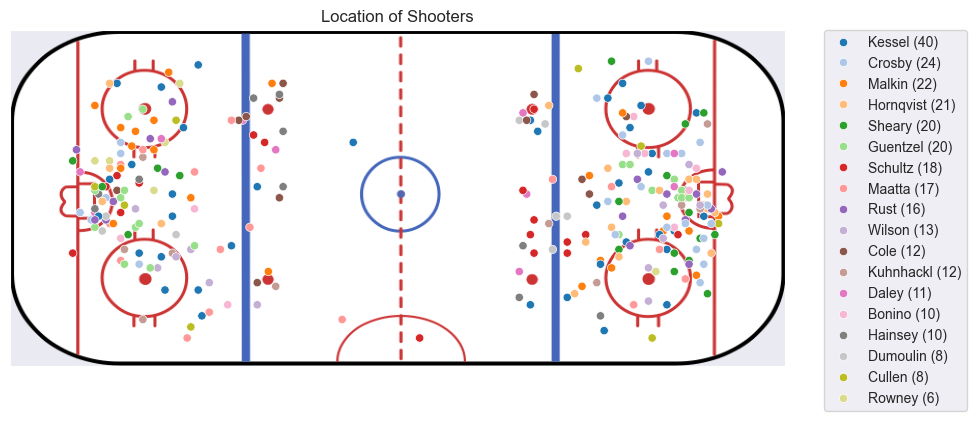

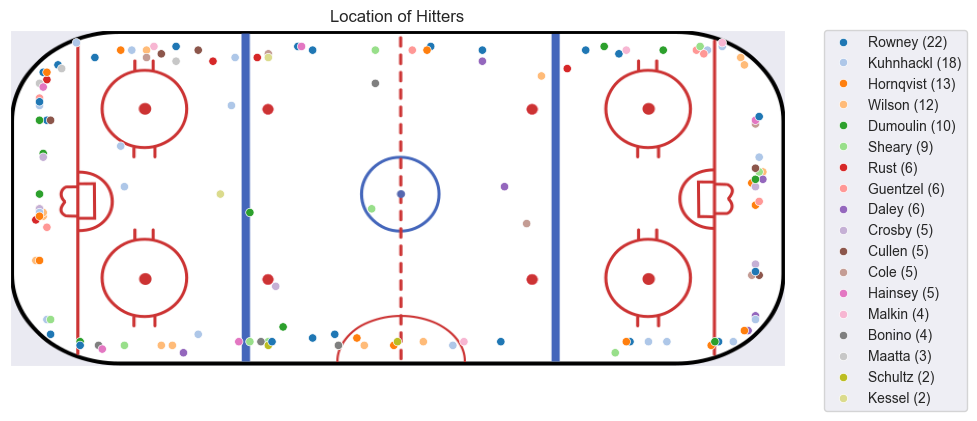

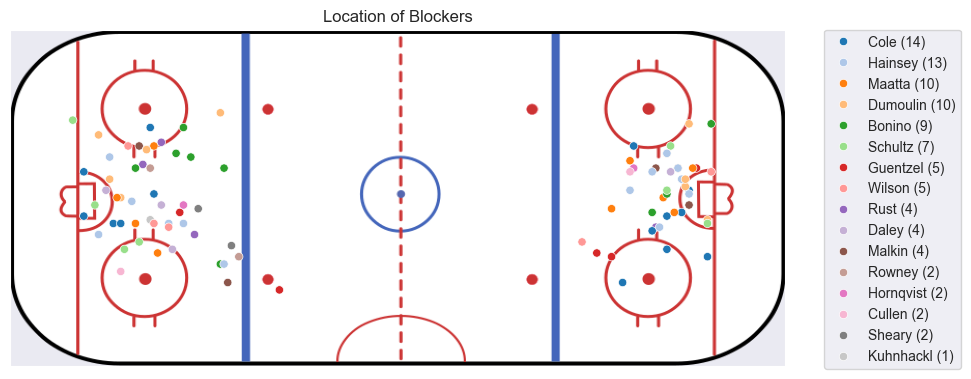

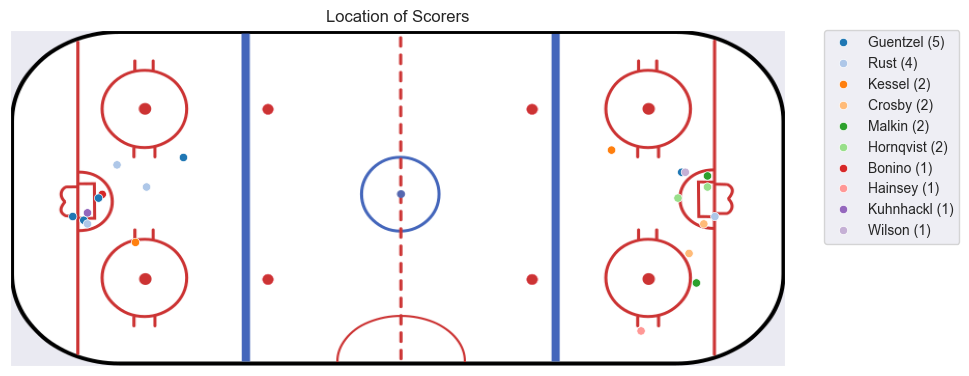

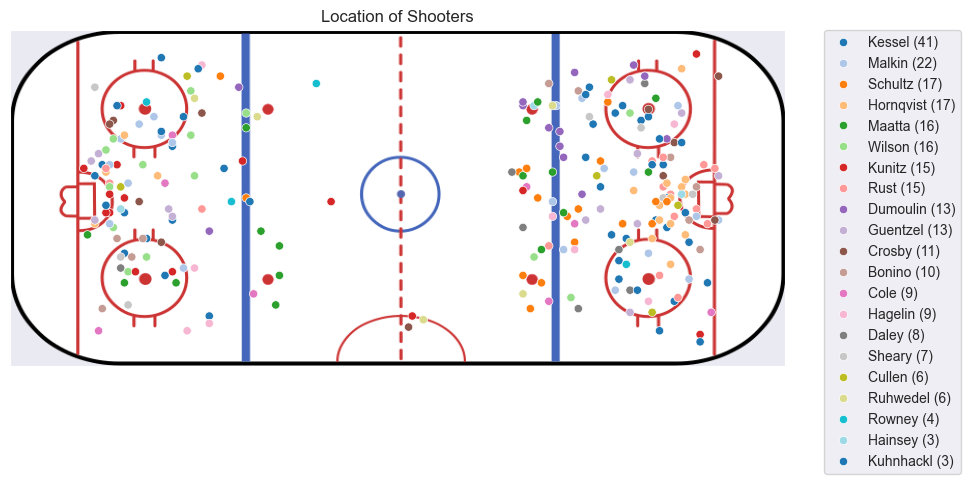

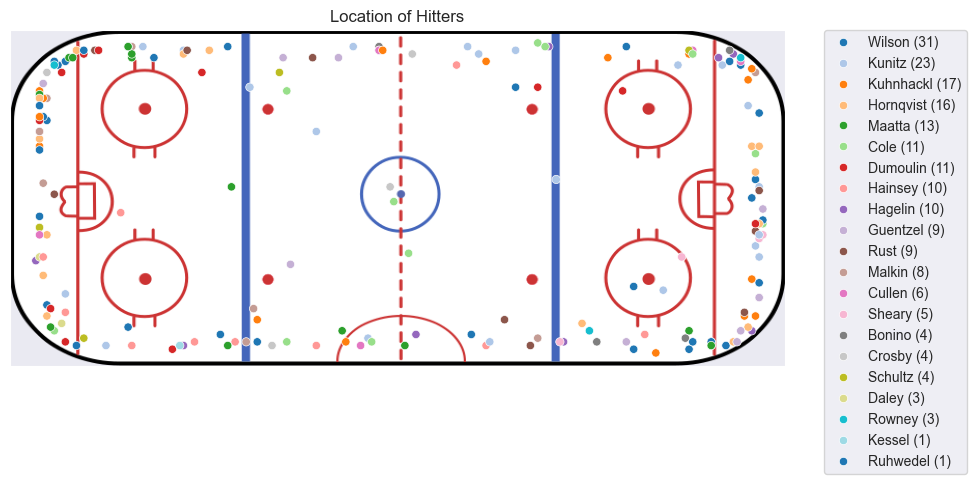

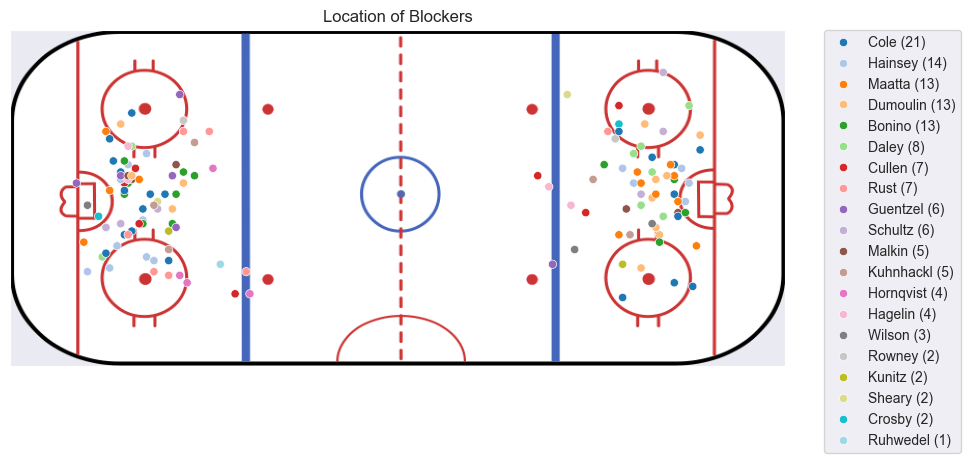

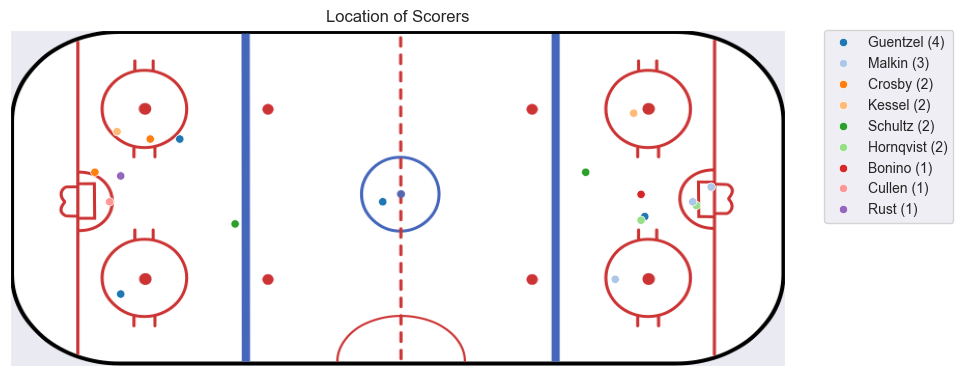

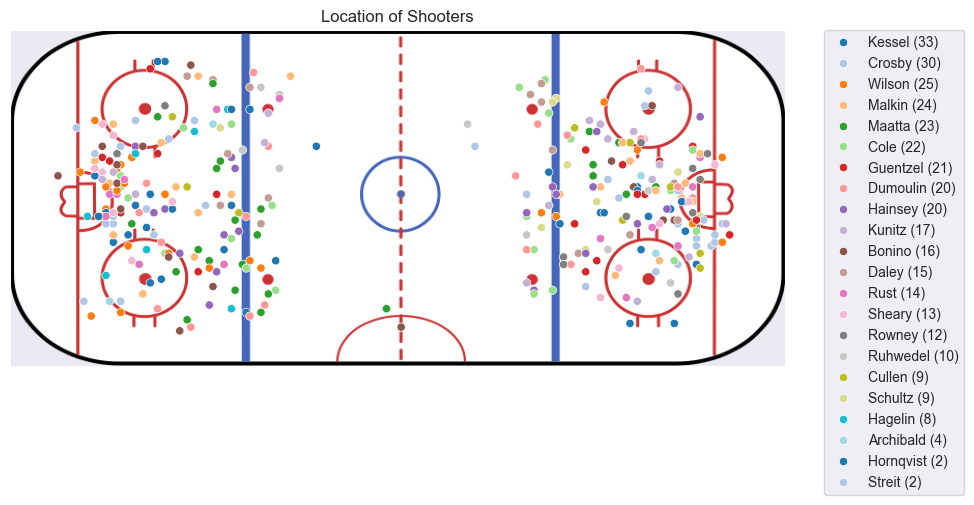

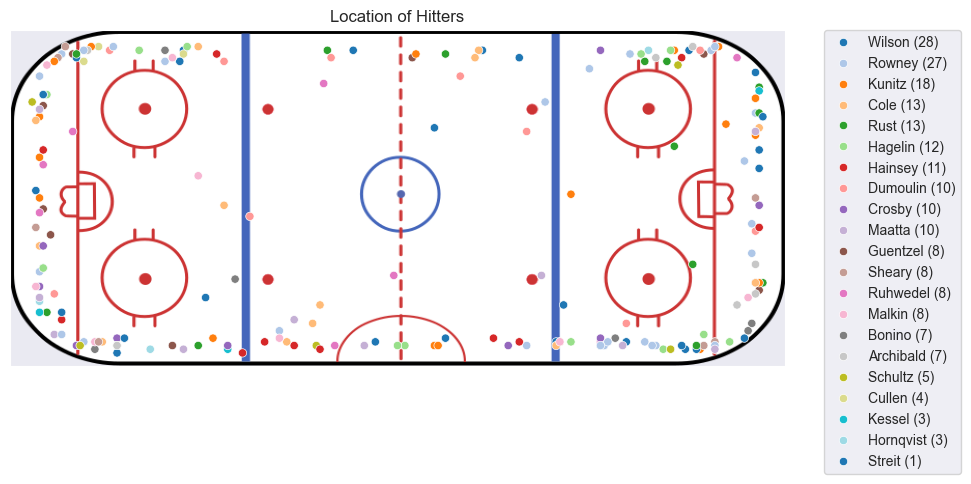

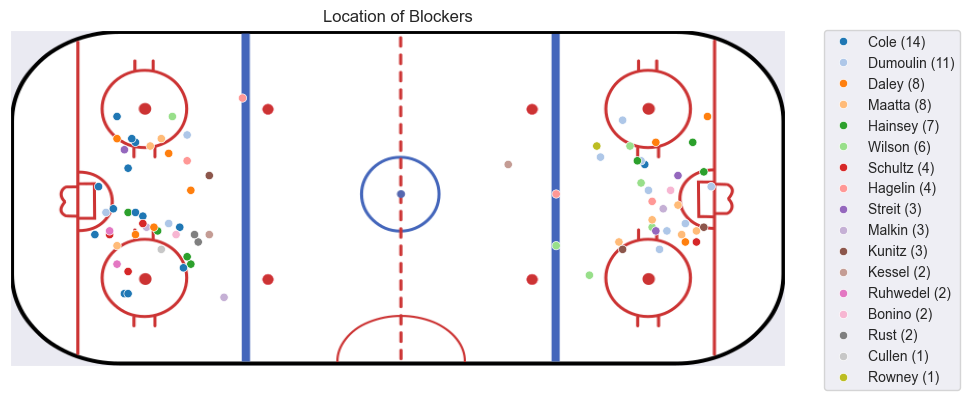

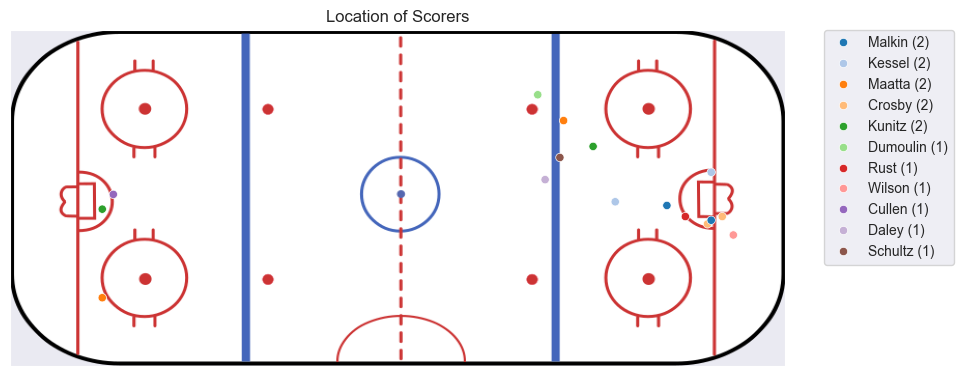

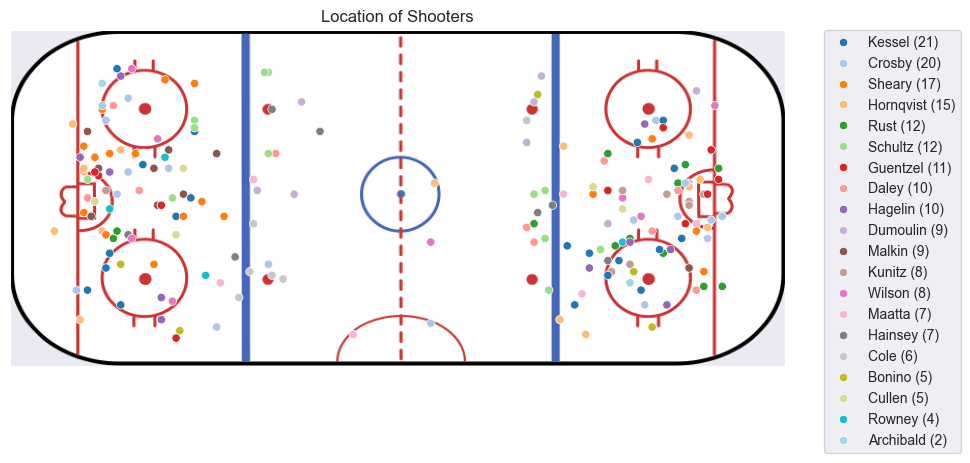

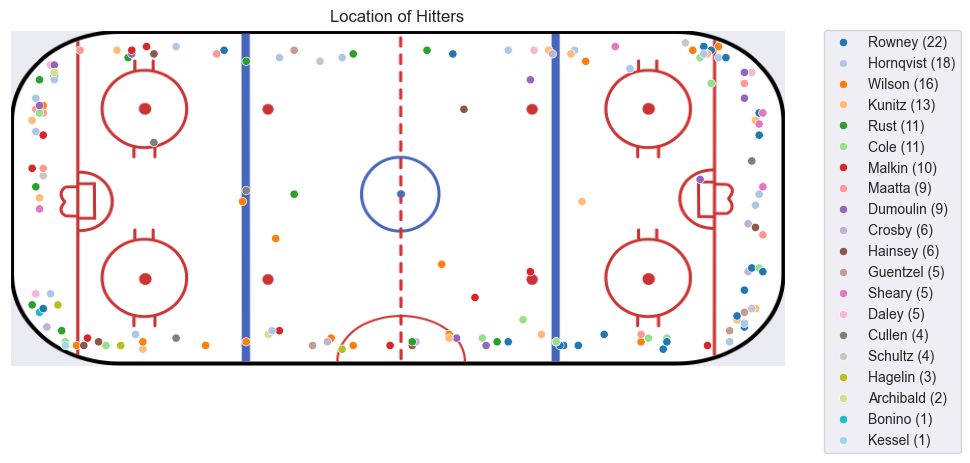

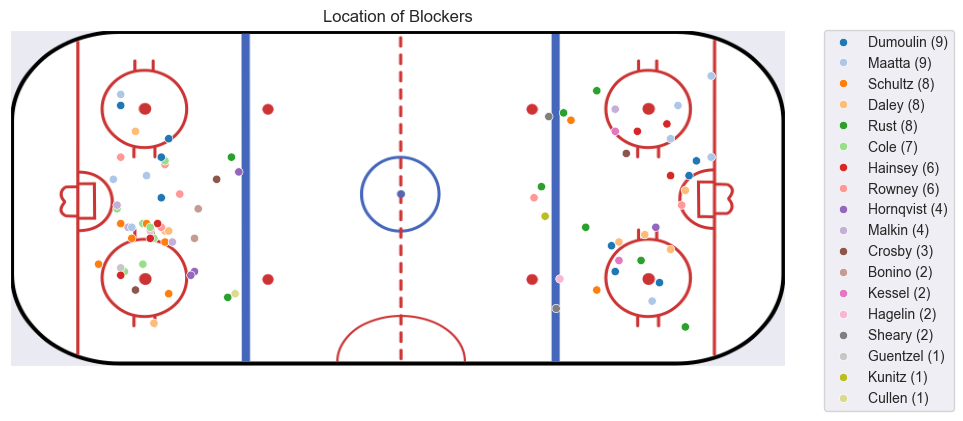

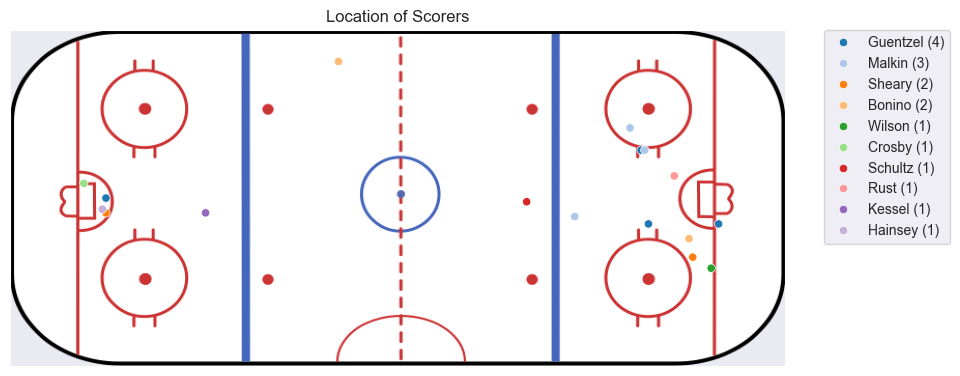

In [60]:
count = 1
for play in good_plays_2017_all_rounds:
    print_large(f'Good Plays, Round {count}, 2017')
    for type in good_player_types:
        plotHockeyPoints(play, 'playerType',type)
    count += 1

## Visualizing Bad Plays 2017

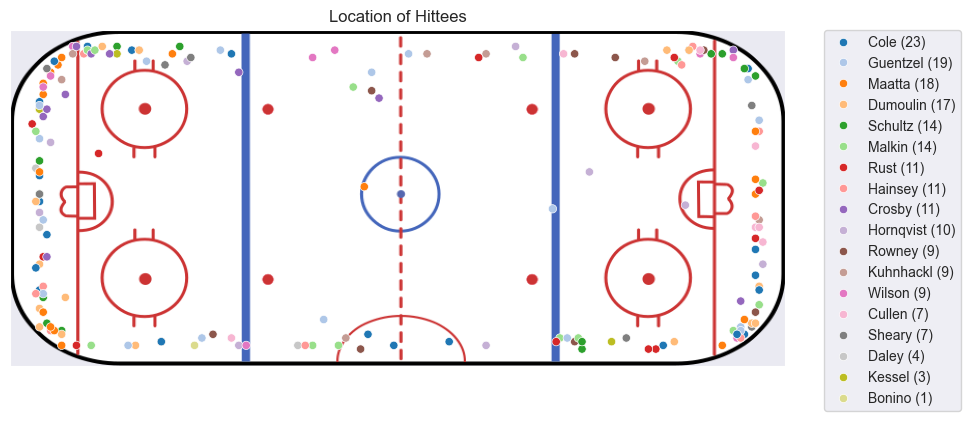

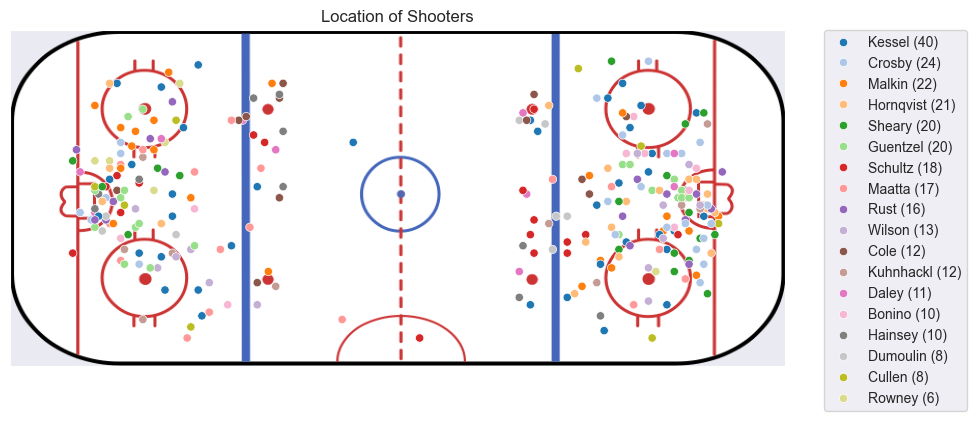

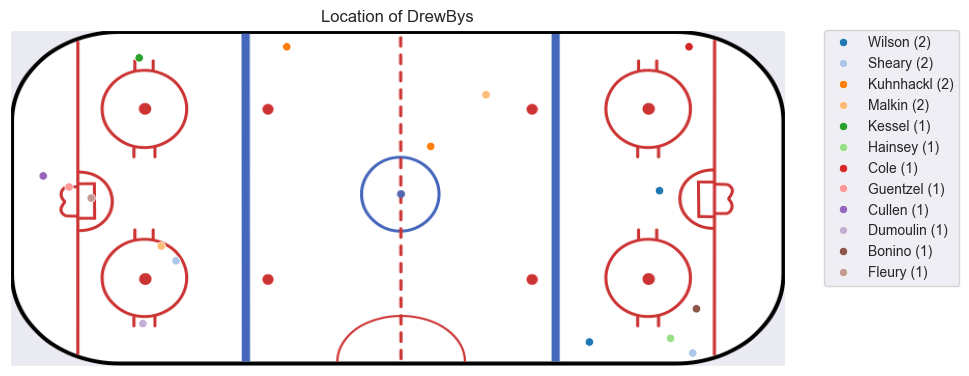

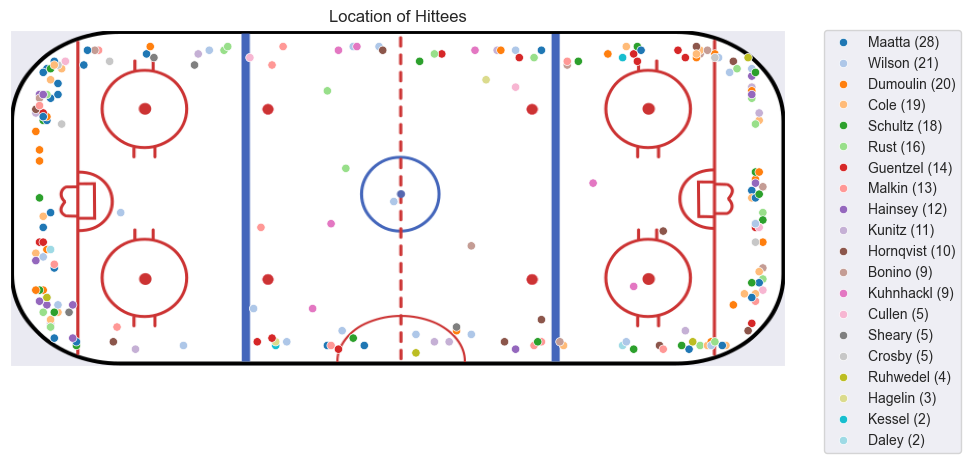

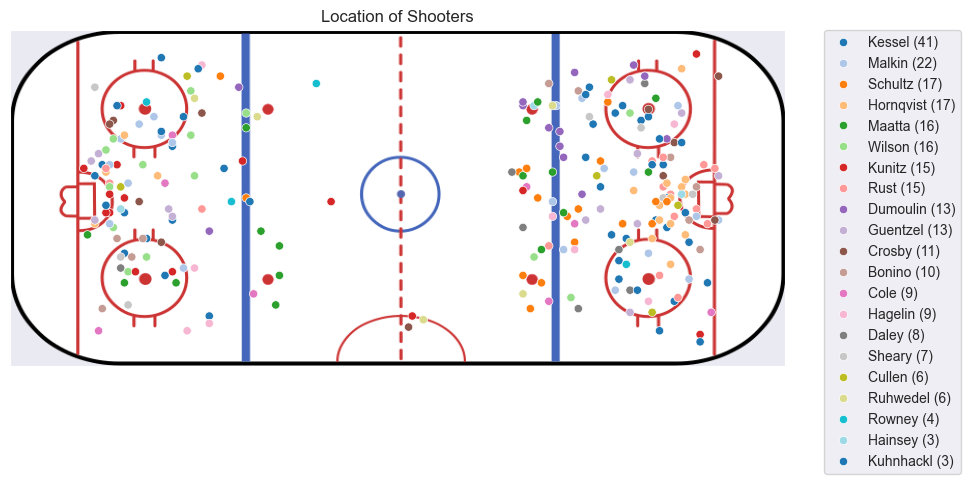

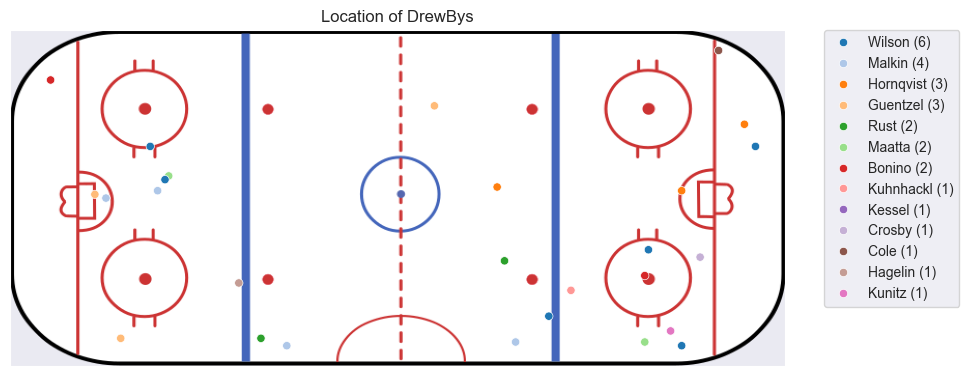

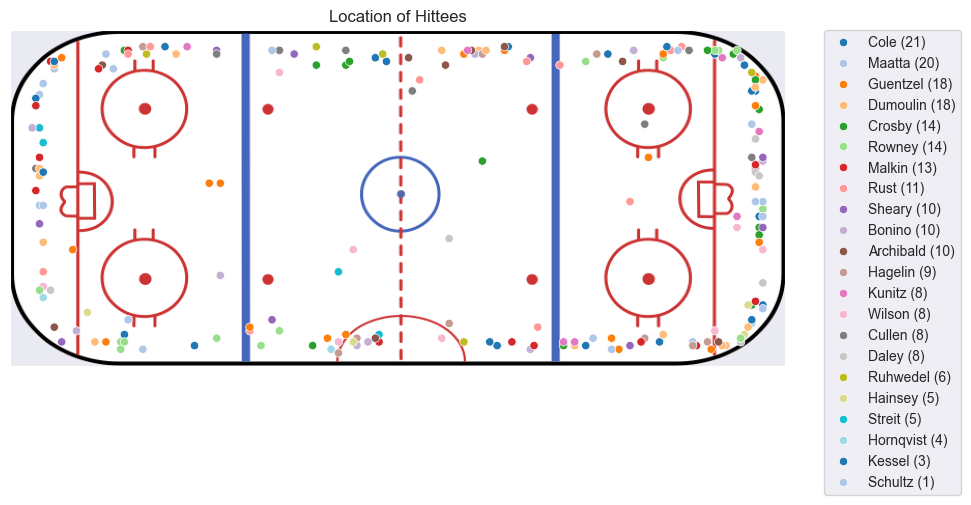

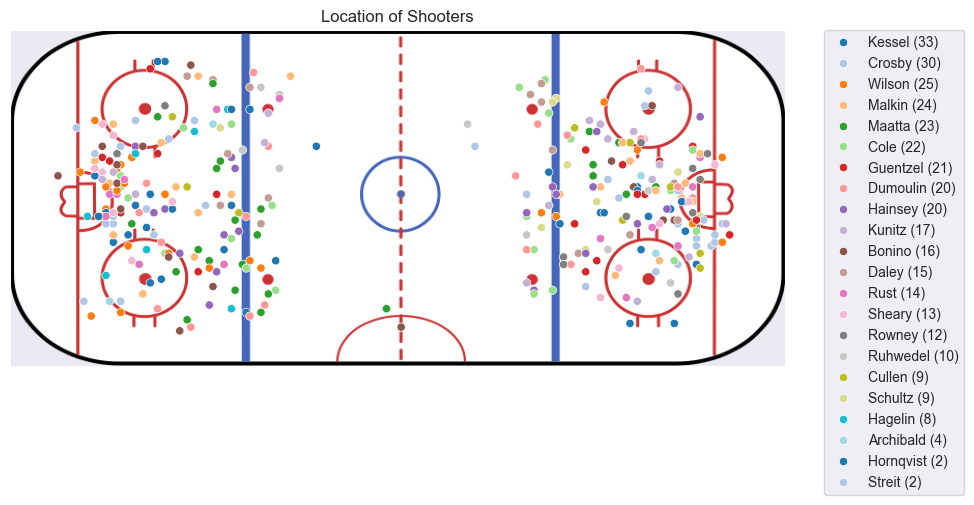

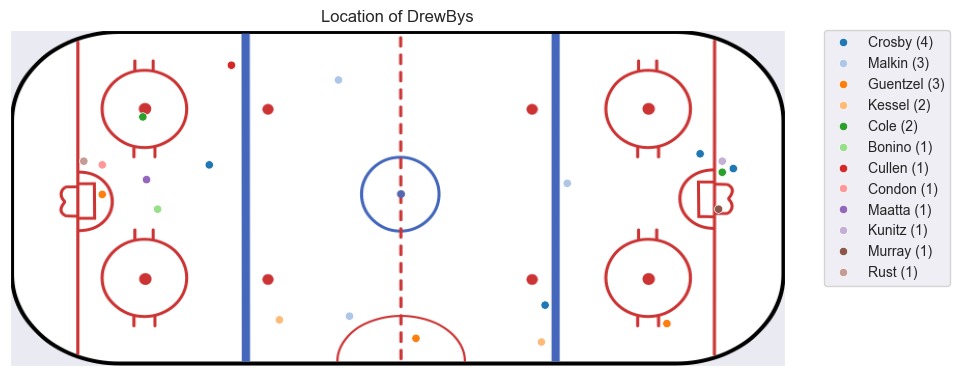

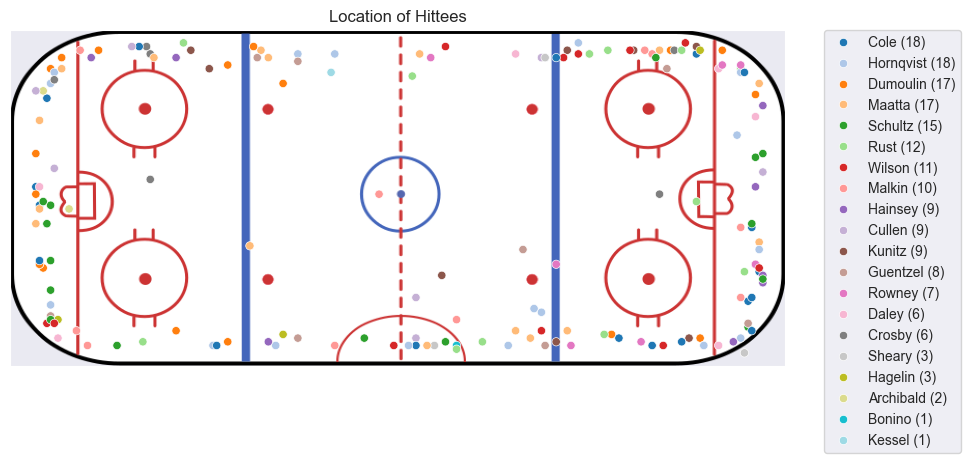

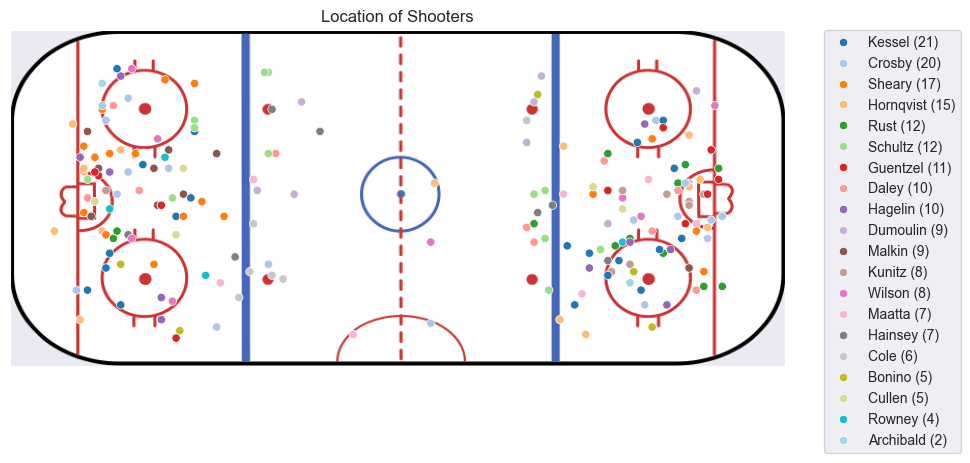

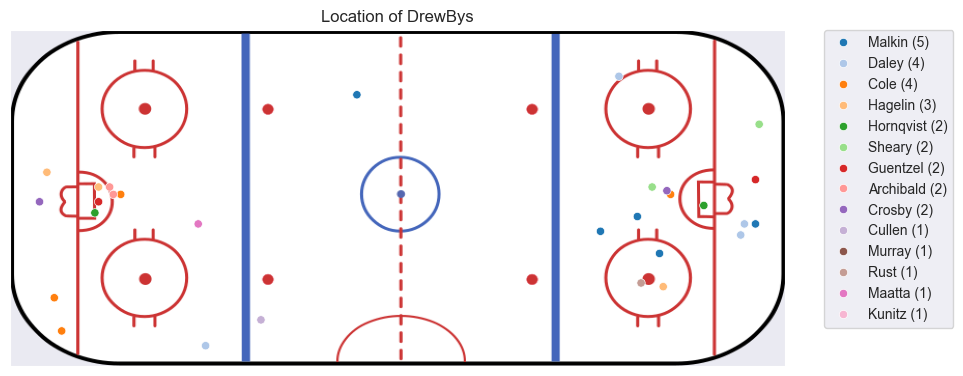

In [61]:
count = 1
for play in bad_plays_2017_all_rounds:
    print_large(f'Bad Plays, Round {count}, 2017')
    for type in bad_player_types:
        plotHockeyPoints(play, 'playerType',type)
    count += 1

## Visualizing Takeaways and Giveaways 2017

In [123]:
# count = 1
# for play in good_plays_2017_all_rounds:
#     print_large(f'Takeaways in Round {count}, 2017')
#     plotHockeyPoints(play, 'event','Takeaway')
#     count += 1
#     
# count = 1
# for play in bad_plays_2017_all_rounds:
#     print_large(f'Giveaways in Round {count}, 2017')
#     plotHockeyPoints(play, 'event','Giveaway')
#     count += 1

# Next, begin gathering more skater stats:

### The next SQL query will pull in basic player stats already compiled per game per player in our NHL dataframe

### Advanced skater stats held in a csv file build a second dataframe.

In [63]:
# pens_2016_playoff_skater_stats_basic = pd.read_sql_query(q.skater_stats_query,conn)

In [124]:
# pens_2016_playoff_skater_stats_basic.head()

As we've already added names and team abbreviations, we can drop a couple of columns:

In [65]:
# pens_2016_playoff_skater_stats_basic = pens_2016_playoff_skater_stats_basic.drop(['player_id','team_id'], axis=1)

In [125]:
# pens_2016_playoff_skater_stats_basic.columns

### Before separating into individual games and playoff rounds, it's helpful to take a look at the playoffs as a whole for the Pittsburgh Penguins:

In [126]:
# players_2016_sums_df = pens_2016_playoff_skater_stats_df.groupby('lastName').aggregate({'goals':'sum', 'assists':'sum', 'plusMinus':'sum', 'hits':'sum', 'game_id':'count', 'timeOnIce':'mean', 'shots':'sum', 'takeaways':'sum','giveaways':'sum','blocked':'sum'}).reset_index()
# #Below, I remove any players that have played fewer than 15 games, since their impact as a whole is so greatly reduced. I can still look at them later when we do a game by game analysis.
# players_2016_sums_df = players_2016_sums_df[players_2016_sums_df['game_id']>15]
# players_2016_sums_df


In [ ]:
# print('TOP FIVE SCORERS')
# print(players_2016_sums_df[['lastName','goals']].sort_values(by='goals', ascending=False).head(5),'\n\n')
# 
# print('TOP FIVE IN ASSISTS')
# print(players_2016_sums_df[['lastName','assists']].sort_values(by='assists', ascending=False).head(), '\n\n')
# 
# print('TOP FIVE FOR +/-')
# print(players_2016_sums_df[['lastName','plusMinus']].sort_values(by='plusMinus',ascending=False).head(), '\n\n')
# 
# print('TOP FIVE FOR SHOTS MADE')
# print(players_2016_sums_df[['lastName','shots']].sort_values(by='shots', ascending=False).head(), '\n\n')

In [ ]:
# #calculate percent of successful shots:
# players_2016_sums_df['shots_made_percent'] = (players_2016_sums_df['goals']/players_2016_sums_df['shots'])*100
# 
# print('TOP FIVE FOR SHOT SUCCESS %')
# players_2016_sums_df[['lastName','shots_made_percent']].sort_values(by='shots_made_percent',ascending=False).head()

### Now let's put together the advanced stats dataframe

In [ ]:
# pens_2016_playoff_skater_stats_adv = pd.read_csv('2016_adv_stats_pens_playoffs.csv',header=1)

In [ ]:
# pens_2016_playoff_skater_stats_adv.head()

In [ ]:
# pens_2016_playoff_skater_stats_adv.info()

In [ ]:
# pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.drop('E+/-', axis=1)

We can use our previously fixed Roster DataFrame to pull first and last names, in order to connect the basic and advanced tables together.

In [127]:
# pens_2016_playoff_skater_stats_adv = pd.merge(pens_2016_playoff_skater_stats_adv, Pens_2016_roster[['Player', 'firstName', 'lastName']], on='Player', how='left')
# pens_2016_playoff_skater_stats_adv.head()


In [ ]:
# pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.drop(['Player','Age','-9999'], axis=1)
# pens_2016_playoff_skater_stats_adv

This is great, but just for readability I want the names as the first two columns

In [ ]:
# # Get the list of column names
# columns = list(pens_2016_playoff_skater_stats_adv.columns)
# 
# # Specify the new column order
# new_order = columns[-2:] + columns[:-2]
# 
# # Reorder the columns in the DataFrame
# pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv[new_order]
# 
# pens_2016_playoff_skater_stats_adv

## Let's put the basic and advanced stats all together into one large DataFrame

In [ ]:
# pens_player_stats_2016 = pd.merge(players_2016_sums_df, pens_2016_playoff_skater_stats_adv, on='lastName')

In [ ]:
# pens_player_stats_2016.columns

There appear to be some duplicate values here, let's get rid of them:

In [ ]:
# # Transpose the DataFrame and identify duplicate rows (duplicate columns after transposing)
# duplicates = pens_player_stats_2016.T[pens_player_stats_2016.T.duplicated()].index
# 
# # Drop duplicate columns
# pens_player_stats_2016 = pens_player_stats_2016.drop(columns=duplicates, errors='ignore')

In [ ]:
# pens_player_stats_2016.columns

### Shot Statistics Overview

In hockey analytics, shot statistics provide valuable insights into a team's or player's offensive performance. Let's explore key shot metrics:

**Shots Attempted (SAtt.)** Total number of shots attempted in all game situations.

**Shots on Goal (Shots)** Subset of attempted shots that were on target and required the goaltender to make a save.

**Through Percentage (Thru%)** Percentage of shots that successfully made it through to the net out of the total shots attempted (`SAtt.`).

**Shots Made Percentage (Shots_made_percent)** Percentage of shots on goal that resulted in a goal.

By examining these shot statistics, analysts and fans gain a comprehensive understanding of the offensive dynamics, accuracy, and goal-scoring proficiency of a team or player. These metrics contribute to a nuanced evaluation of performance beyond traditional box score statistics.


In [ ]:
# shooting_stats_2016 = pens_player_stats_2016[['lastName','SAtt.','Thru%','shots','shots_made_percent','goals']].sort_values(by='SAtt.', ascending=False)
# shooting_stats_2016

### CORSI and Fenwick are two common ways to measure player success. Below, we look at the CORSI For % (CF%) and Fenwick For % (FF%):


**Corsi For (CF)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) generated by a team or player while they are on the ice.
It is an indicator of offensive activity and measures how often a team or player is involved in offensive plays.


**Corsi Against (CA)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) faced by a team or player while they are on the ice.
It is an indicator of defensive activity and measures how often a team or player is defending against shot attempts from the opposing team.

**CF% = CF/(CF+CA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.



**Fenwick For (FF)** represents the total number of unblocked shot attempts (shots on goal and missed shots) generated by a team or player while they are on the ice.
FF does not include blocked shots in the count, focusing on shots that reach the net or miss the net entirely.


**Fenwick Against (FA)** represents the total number of unblocked shot attempts (shots on goal and missed shots) faced by a team or player while they are on the ice.
Similar to FF, FA excludes blocked shots, providing a measure of defensive activity without considering shots that were blocked by the opposing team.

In [ ]:
Corsi_Fenwick_stats_2016 = pens_player_stats_2016[['lastName','CF%', 'FF%']].sort_values(by='CF%', ascending=False)
Corsi_Fenwick_stats_2016

CORSI and Fenwick are two different ways to measure nearly the same thing - the difference being the inclused of blocked shots. Their strong connection can be seen in the graph below:

In [ ]:
# players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']
# 
# # Create the scatter plot
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2016, hue='lastName', size='lastName',
#                 sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2016['lastName']})
# 
# 
# 
# plt.title('Correlation of CORSI and Fenwick by Player', fontsize=16, y=1.05)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
# plt.show()

**PDO, often referred to as "Puck Luck,"** is a composite statistic in hockey analytics that combines a team's on-ice shooting percentage (Shooting Percentage or Sh%) and save percentage (Save Percentage or Sv%) in order to assess a team's overall efficiency in converting scoring chances into goals. The term "PDO" itself doesn't stand for anything specific; it's just a name given to this combined metric.

The formula for PDO is:

PDO = Shooting Percentage + Save Percentage


Here's a breakdown of the components:



**Shooting Percentage (oiSH%)** represents the proportion of shots on goal that result in goals. It is calculated as the number of goals scored divided by the number of shots on goal.
Shooting Percentage (Sh%) = (Goals / Shots on Goal) * 100


**Save Percentage (oiSV%)** represents the proportion of shots on goal that are stopped by the goaltender. It is calculated as the number of saves divided by the number of shots on goal faced by the goaltender.
Save Percentage (Sv%) = (Saves / Shots on Goal Faced) * 100

By combining Shooting Percentage and Save Percentage, PDO aims to capture the overall randomness and variability in a team's performance that may not be entirely within their control. A high PDO may indicate that a team is experiencing above-average luck, while a low PDO may suggest below-average luck. Over the long term, teams are generally expected to regress towards an average PDO of around 100.

It's important to note that while PDO can provide insights into short-term luck or variance, it is not necessarily a predictive metric for long-term team success. Teams with consistently high PDO may be benefiting from luck, but sustained success often requires strong underlying performance in other aspects of the game.

In [ ]:
puck_luck_2016 = pens_player_stats_2016[['lastName','oiSH%', 'oiSV%','PDO']].sort_values(by='PDO', ascending=False)
puck_luck_2016

In [128]:
# puck_luck_2016_melted = pd.melt(puck_luck_2016, id_vars='lastName')
# 
# # Pivot the DataFrame for a stacked bar graph
# df_puck_luck_pivoted = puck_luck_2016_melted.pivot(index='lastName', columns='variable', values='value')
# 
# # Sort the DataFrame by the 'PDO' column in descending order
# df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)
# 
# # Use Seaborn stacked barplot
# ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')
# 
# plt.title('Puck Luck Stats for Each Player', fontsize=16, y=1.05)
# plt.xlabel('Player')
# plt.ylabel('Value')
# 
# # Customize legend labels
# legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
# handles, _ = ax.get_legend_handles_labels()
# 
# # Create a separate legend
# legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in puck_luck_2016_melted['variable'].unique()],
#                     title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))
# 
# # Adjust legend color
# for handle, label in zip(legend.legend_handles, legend.get_texts()):
#     label.set_color(handle.get_facecolor())
# 
# # Rotate x-axis labels at 45 degrees
# plt.xticks(rotation=45, ha='right')
# 
# plt.show()


In [130]:
# sns.barplot(x='plusMinus', y='lastName', data=pens_player_stats_2016, orient='h', hue=pens_player_stats_2016['plusMinus'] >= 0, order=pens_player_stats_2016.sort_values('plusMinus', ascending=False)['lastName'])
# plt.xlabel('Plus/Minus Value')
# plt.ylabel('')
# plt.title('Player +/- 2016 Playoffs', fontsize=16, y=1.02)
# plt.legend().set_visible(False)
# plt.savefig('PlayerPlusMinus2016.jpg')
# plt.show()


## Looking at goals for the entire 2016 playoffs vs. average icetime per player:

In [ ]:
# plt.figure(figsize=(14, 6))
# # Create the bar plot
# ax = sns.barplot(data=players_2016_sums_df, x='timeOnIce', y='goals', hue='lastName', dodge=False)
# 
# # Get legend handles and labels
# handles, labels = ax.get_legend_handles_labels()
# 
# # Annotate each bar with player name
# for p, player_name in zip(ax.patches, labels):
#     ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
# 
# plt.xlabel('Average Ice Time (352-1270 seconds)')
# plt.ylabel('Total Goals')
# plt.title('Total Goals vs. Average Game Ice Time', fontsize=16, y=1.02)
# plt.xticks([])  # Remove x-axis labels
# plt.legend().set_visible(False)  # Remove legend
# plt.savefig('goalsVsIcetime2016.png')
# plt.show()


### Visualizing as a percent of the whole, with a focus on Hagelin, Bonino and Kessel:

In [ ]:
labels = players_2016_sums_df['lastName']
sizes = players_2016_sums_df['goals']
colors = sns.color_palette("Spectral")

# Sort by 'goals' in descending order
players_2016_sums_df = players_2016_sums_df.sort_values(by='goals', ascending=False)

# Define explode for specific slices
explode = [0.2 if label in ['Bonino', 'Hagelin', 'Kessel'] else 0 for label in labels]

plt.figure(figsize=(12, 12))

# Draw pie chart without autopct labels
patches, _ = plt.pie(sizes, labels=None, startangle=90, colors=colors, explode=explode)

# Calculate and display percentage labels
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (patches[i].theta1 + patches[i].theta2) / 2
    x = patches[i].center[0] + patches[i].r * 1.2 * np.cos(np.radians(angle))
    y = patches[i].center[1] + patches[i].r * 1.2 * np.sin(np.radians(angle))
    
    # Calculate percentage
    percentage = (size / sizes.sum()) * 100
    
    plt.text(x, y, f'{label} ({percentage:.1f}%)', ha='center', va='center', rotation=angle, fontsize=12)


plt.title('Percent of Total Team Goals, 2016 Playoffs', fontsize=18, y=1.10)
plt.savefig('PercentTotalGoals2016.png')
plt.show()


In [ ]:
players_2016_sums_df['dot_size'] = 100  # Default size for most players
players_2016_sums_df.loc[players_2016_sums_df['lastName'].isin(['Bonino', 'Kessel', 'Hagelin']), 'dot_size'] = 200  # Larger size for specific players

plt.figure(figsize=(9, 7))  # Adjust the figure size

ax = sns.scatterplot(data=players_2016_sums_df, x='goals', y='plusMinus', hue='lastName', size='dot_size', sizes=(100, 200))

plt.title('Goals Scored vs. +/- 2016 Playoffs', fontsize=18, y=1.02)

# Annotate points with player names
for i, row in players_2016_sums_df.iterrows():
    ax.text(row['goals'] + 0.2, row['plusMinus'], row['lastName'], ha='left', va='center', fontsize=12)

# Remove legend
ax.legend().set_visible(False)

# Set x and y axis labels
plt.xlabel('Number of Goals Scored')
plt.ylabel('Player +/-')
plt.savefig('goalsPlusMinus2016.png')
plt.show()